In [1]:
import pandas as pd

# dataset location
file_path = './data/historical_data/binance_XRPUSDT.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [2]:
df.shape     

(51053, 10)

In [4]:
df.columns

Index(['Unix', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume XRP',
       'Volume USDT', 'tradecount'],
      dtype='object')

In [5]:
df.sample(5)

Unix                 Date   Symbol     Open     High      Low  \
47761  1537333200000  2018-09-19 05:00:00  XRPUSDT  0.32614  0.33218  0.32614   
23910  1623420000000  2021-06-11 14:00:00  XRPUSDT  0.87590  0.87730  0.86380   
3285   1723788000000  2024-08-16 06:00:00  XRPUSDT  0.56630  0.56930  0.56490   
6414   1712523600000  2024-04-07 21:00:00  XRPUSDT  0.59230  0.59260  0.59060   
31429  1596308400000  2020-08-01 19:00:00  XRPUSDT  0.28617  0.29498  0.28589   

         Close   Volume XRP   Volume USDT  tradecount  
47761  0.32922   2243786.80  7.395757e+05        1348  
23910  0.86480  13754577.27  1.194890e+07       13143  
3285   0.56910   3633469.00  2.062053e+06        7356  
6414   0.59090   6793032.00  4.019374e+06        4848  
31429  0.28966  55826701.50  1.626066e+07       24158

In [6]:
# Generates summary statistics for numerical columns in the DataFrame
df.describe()


Unix          Open          High           Low         Close  \
count  5.105300e+04  51053.000000  51053.000000  51053.000000  51053.000000   
mean   1.627268e+12      0.523218      0.527121      0.518846      0.523233   
std    6.406963e+10      0.348987      0.353122      0.344337      0.349016   
min    1.525421e+12      0.119400      0.133570      0.101290      0.119420   
25%    1.571555e+12      0.301470      0.303000      0.299850      0.301460   
50%    1.617584e+12      0.464800      0.467600      0.461850      0.464800   
75%    1.689667e+12      0.592000      0.596100      0.587900      0.592000   
max    1.735686e+12      2.849800      2.909200      2.704400      2.849900   

         Volume XRP   Volume USDT     tradecount  
count  5.105300e+04  5.105300e+04   51053.000000  
mean   1.550014e+07  1.045800e+07   15111.453294  
std    2.768452e+07  2.442561e+07   34557.226251  
min    0.000000e+00  0.000000e+00       0.000000  
25%    3.347801e+06  1.032426e+06    2528.000000  
50%    8.388095e+06  3.725506e+06    5647.000000  
75%    1.716944e+07  9.798784e+06   13360.000000  
max    1.404208e+09  7.636114e+08  950394.000000

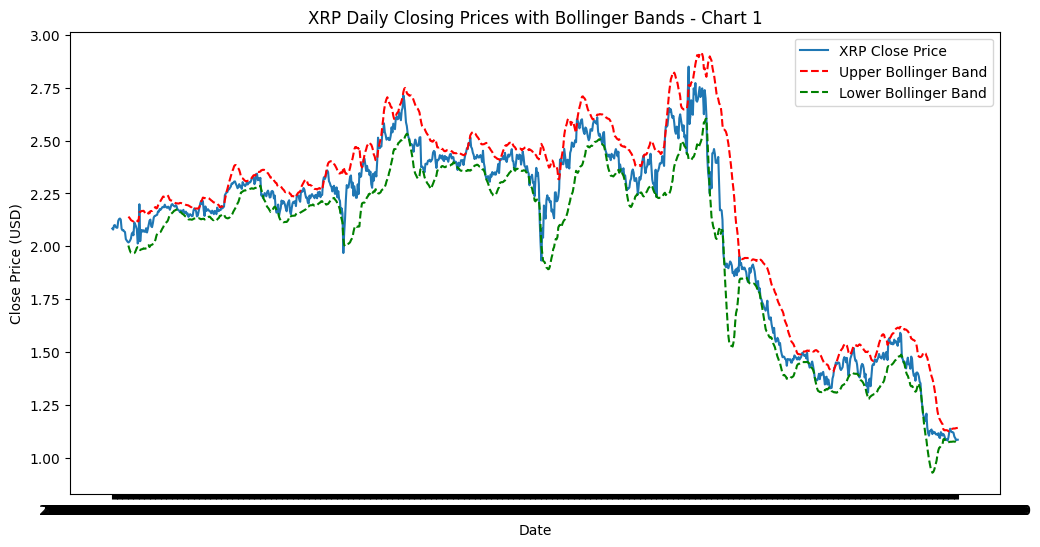

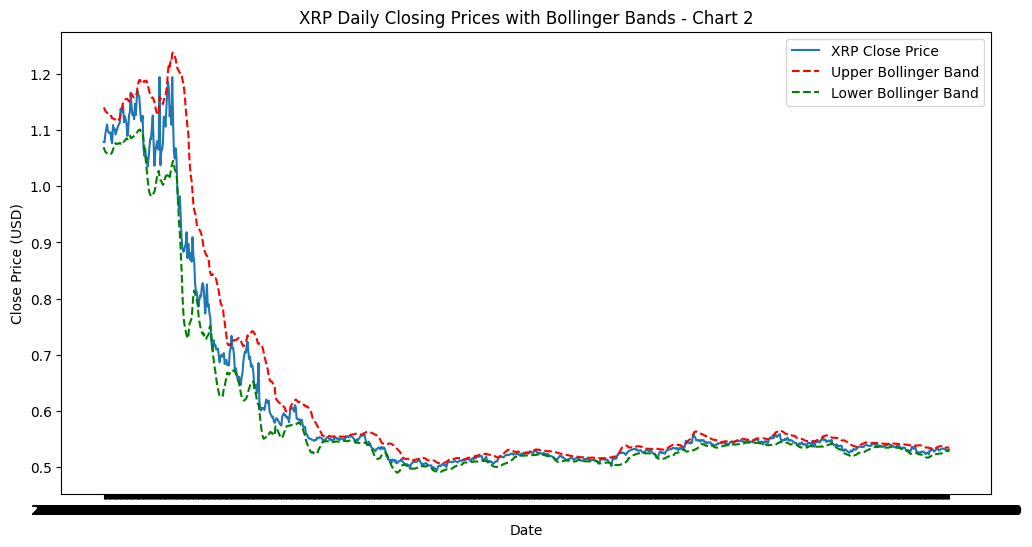

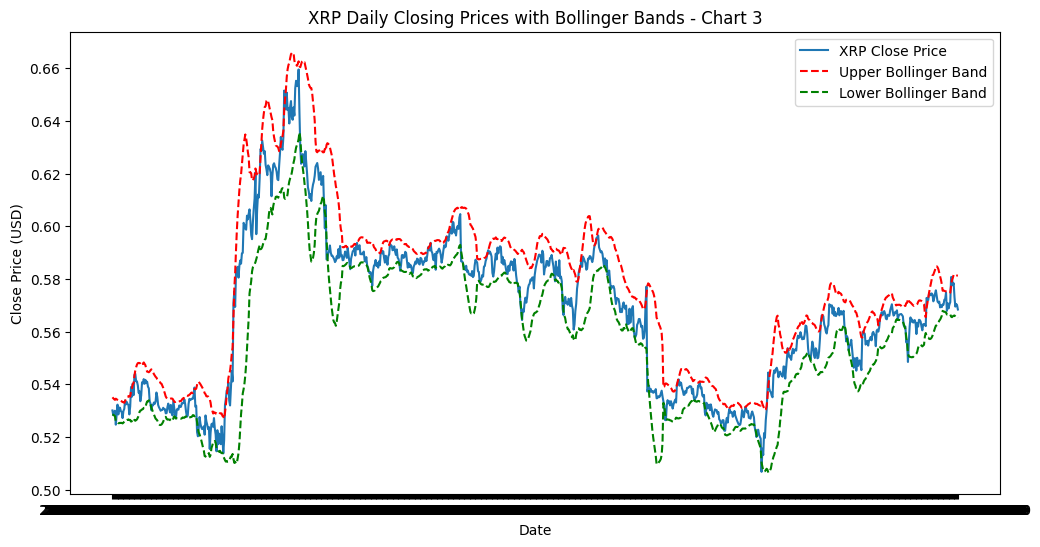

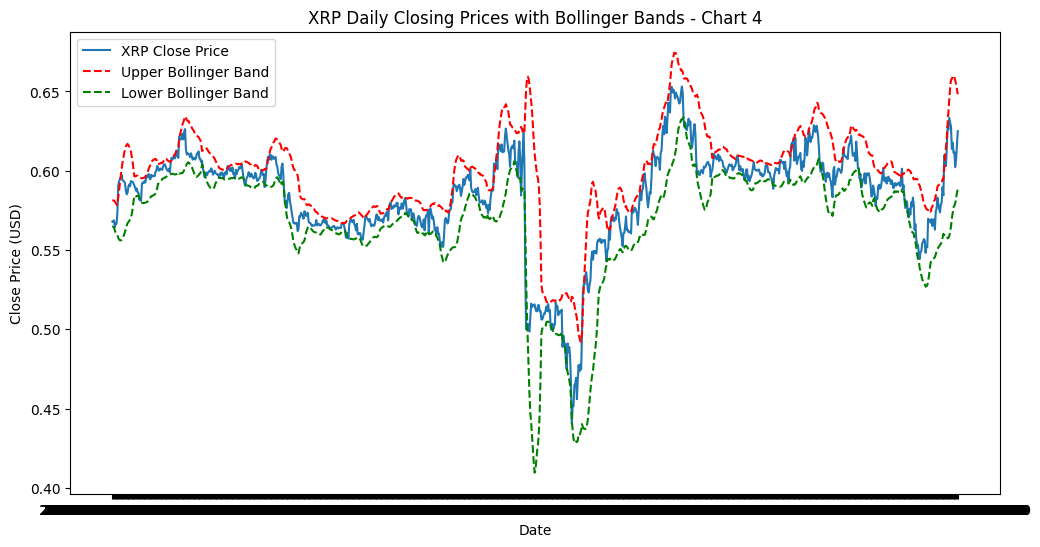

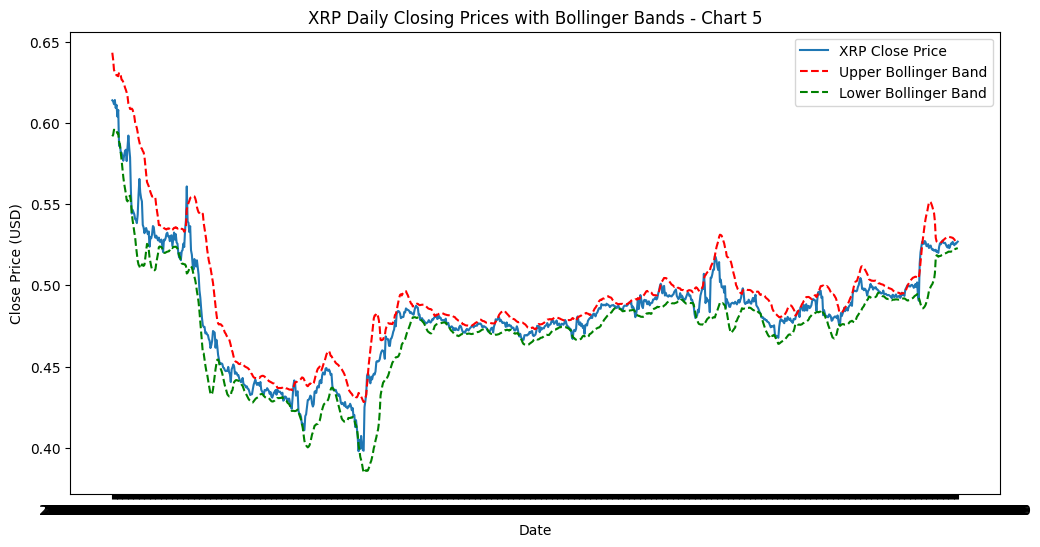

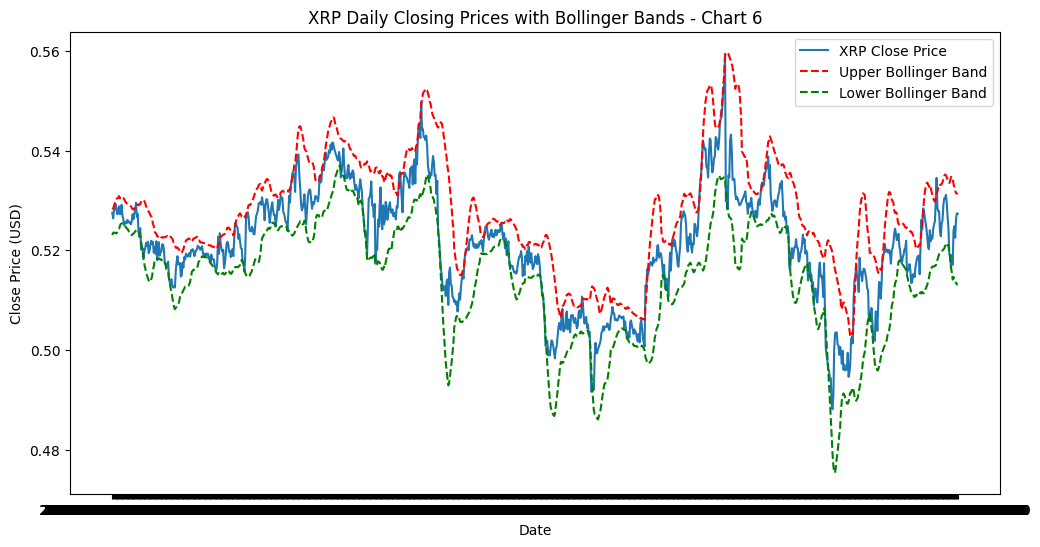

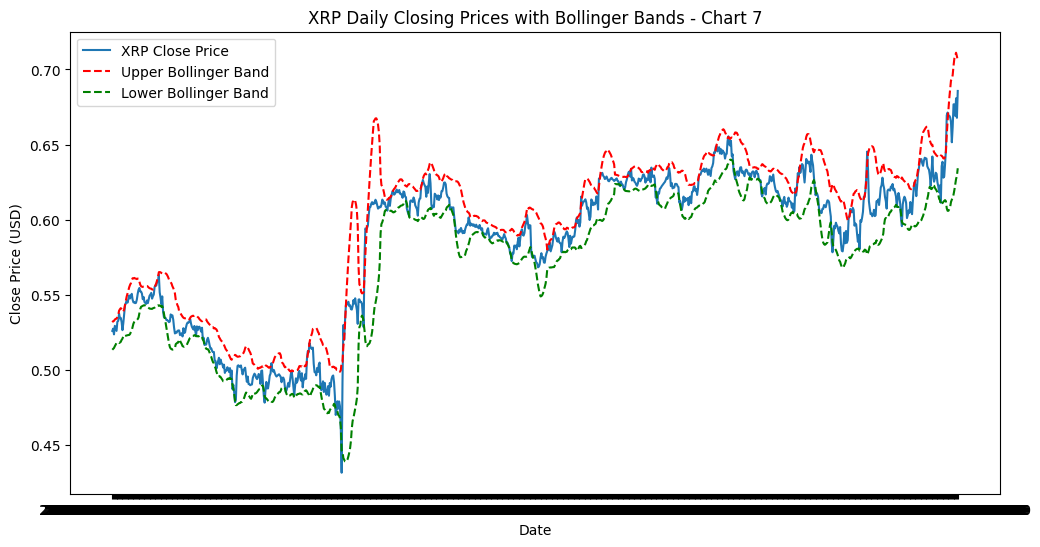

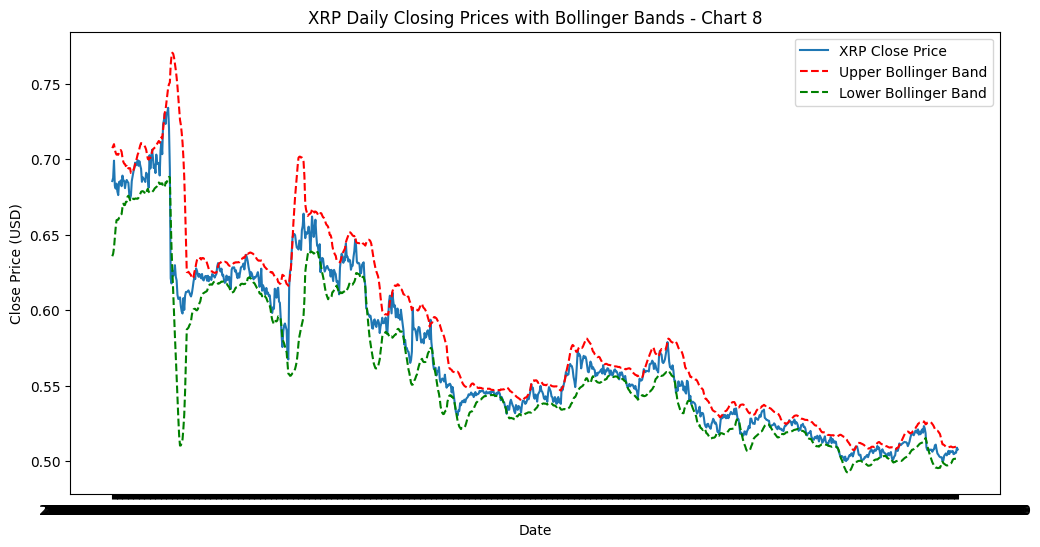

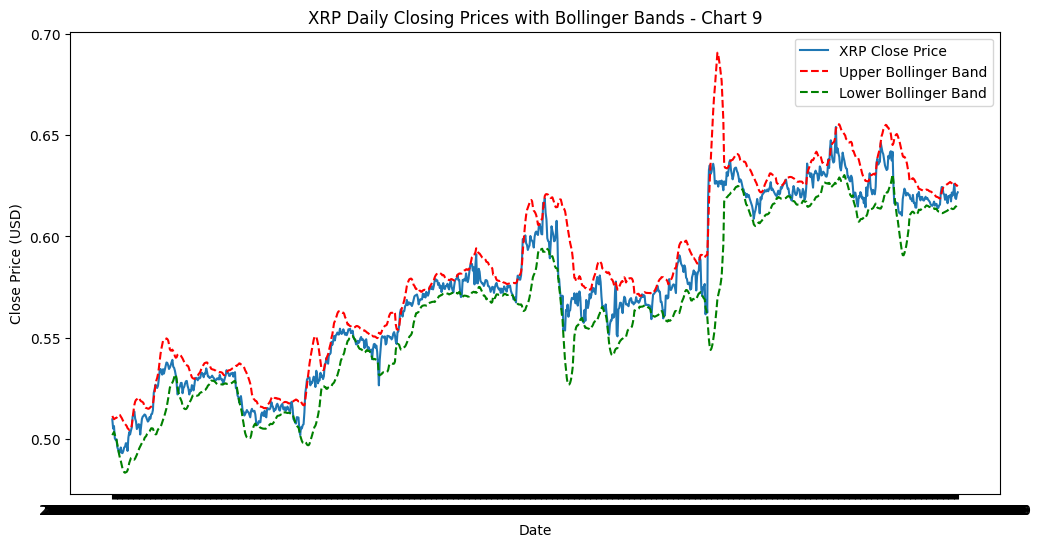

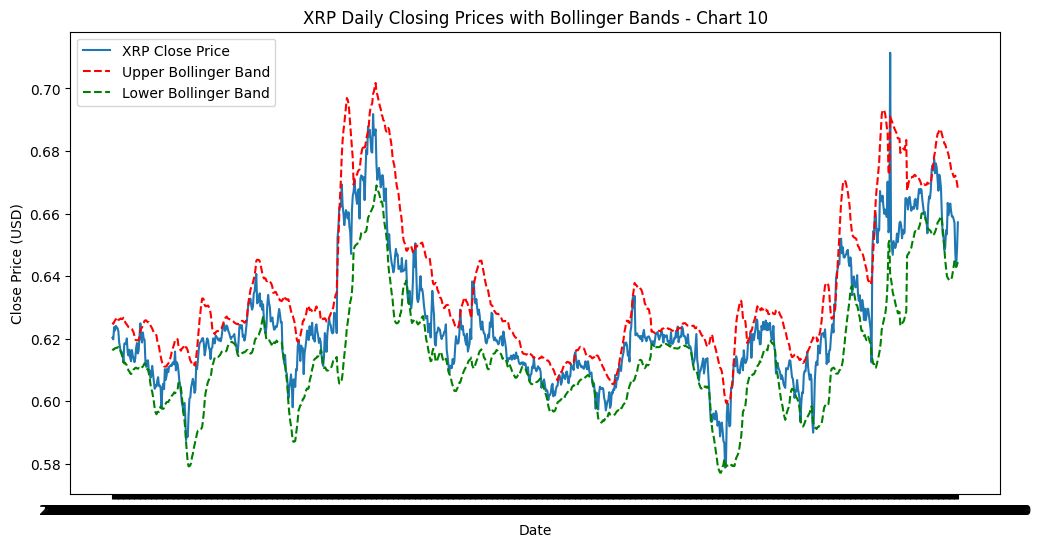

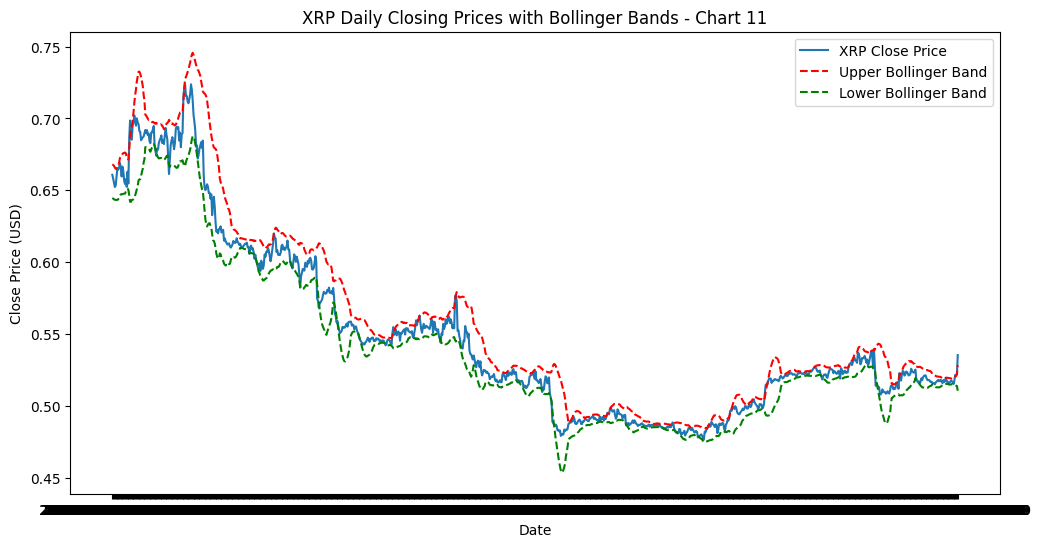

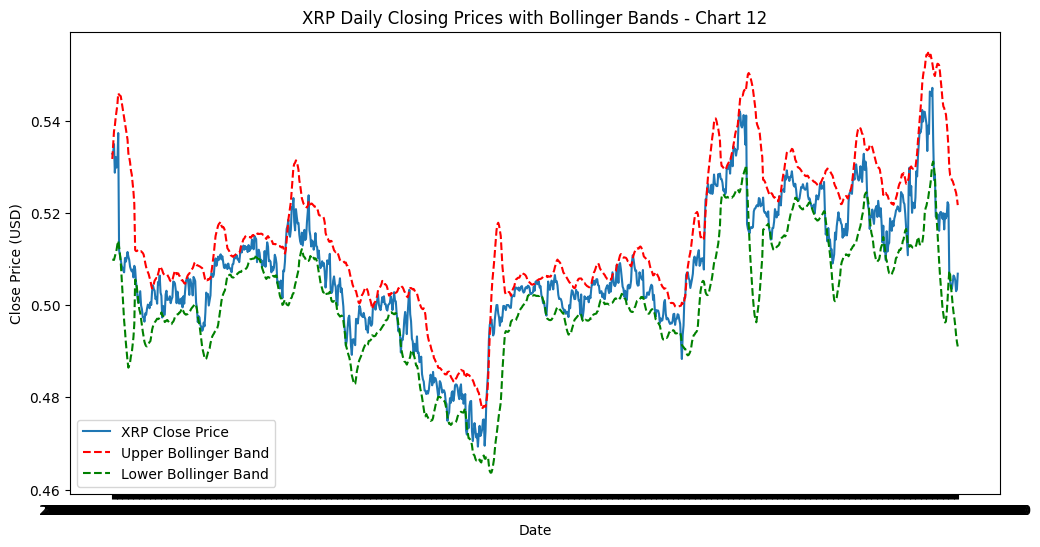

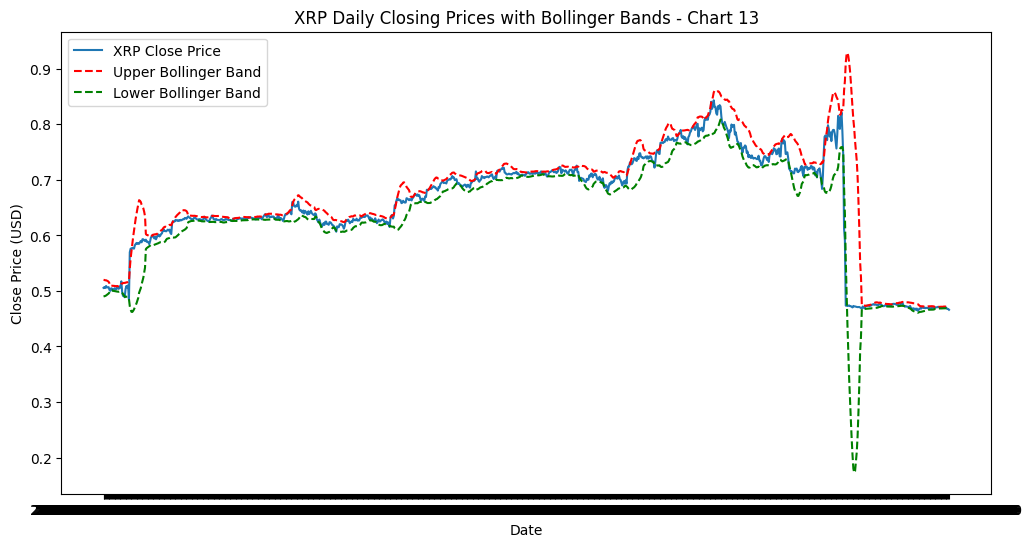

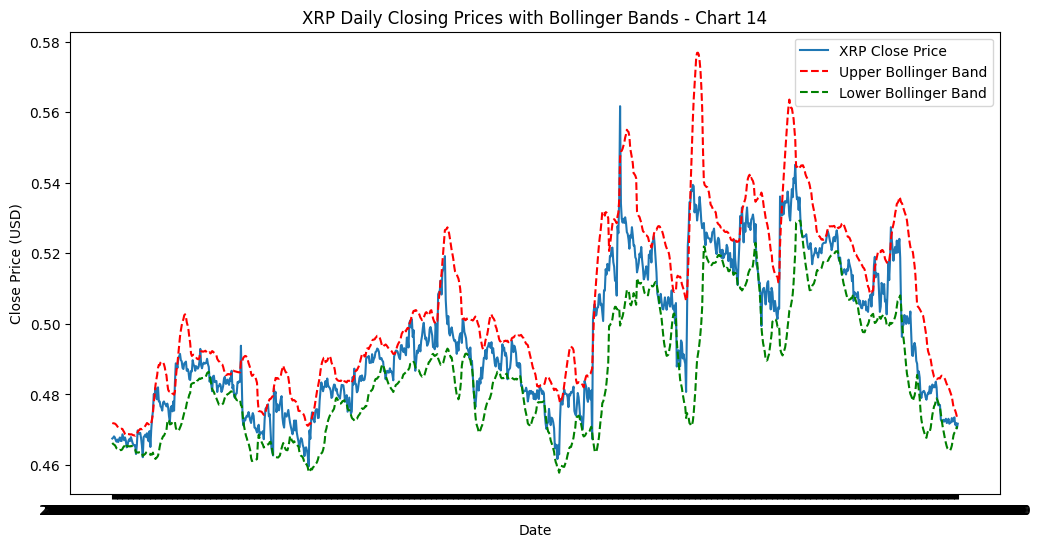

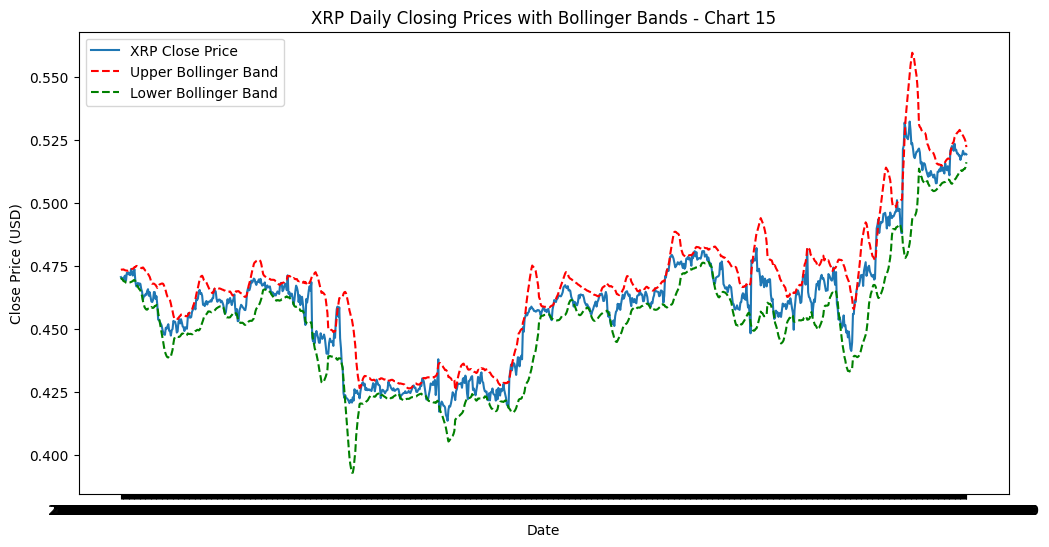

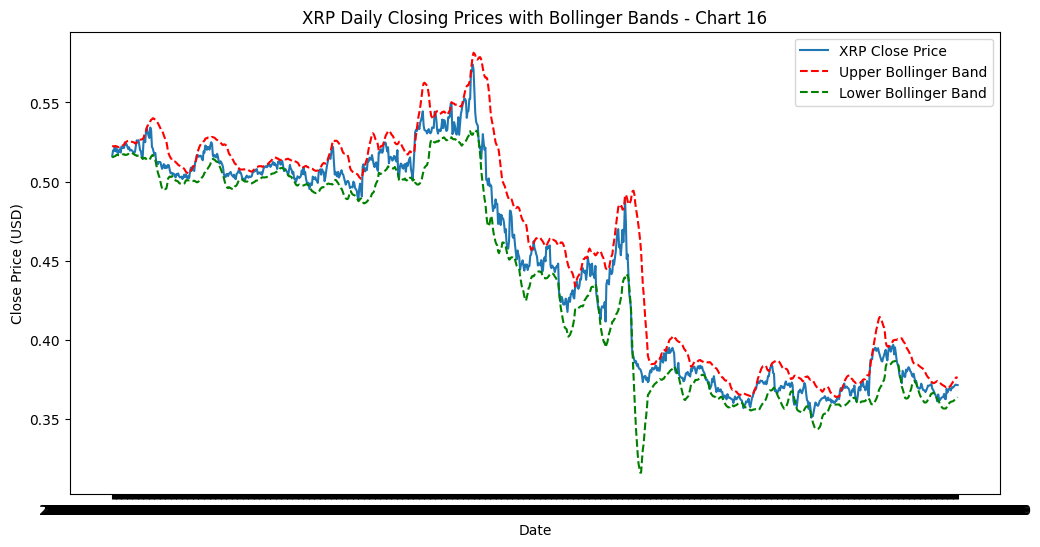

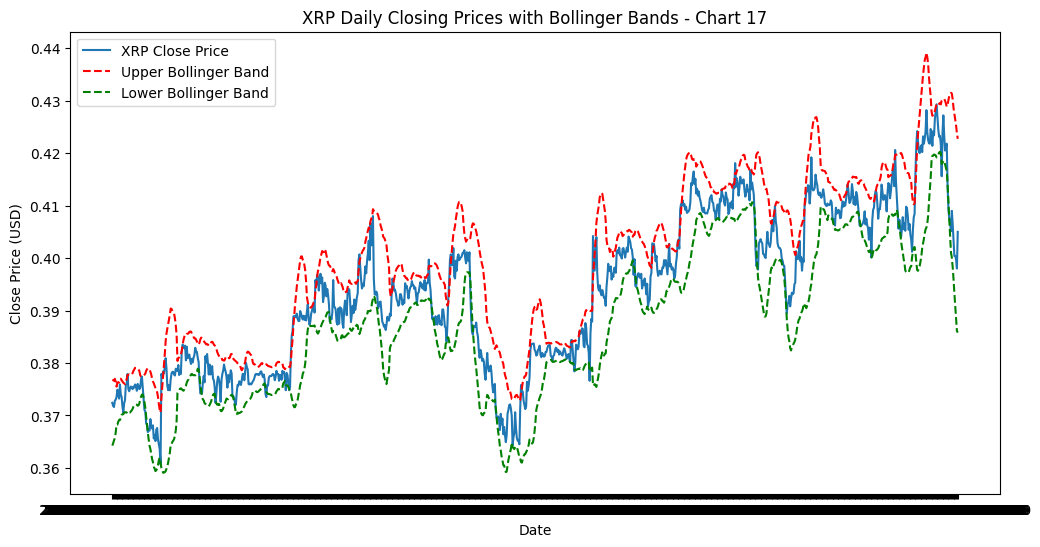

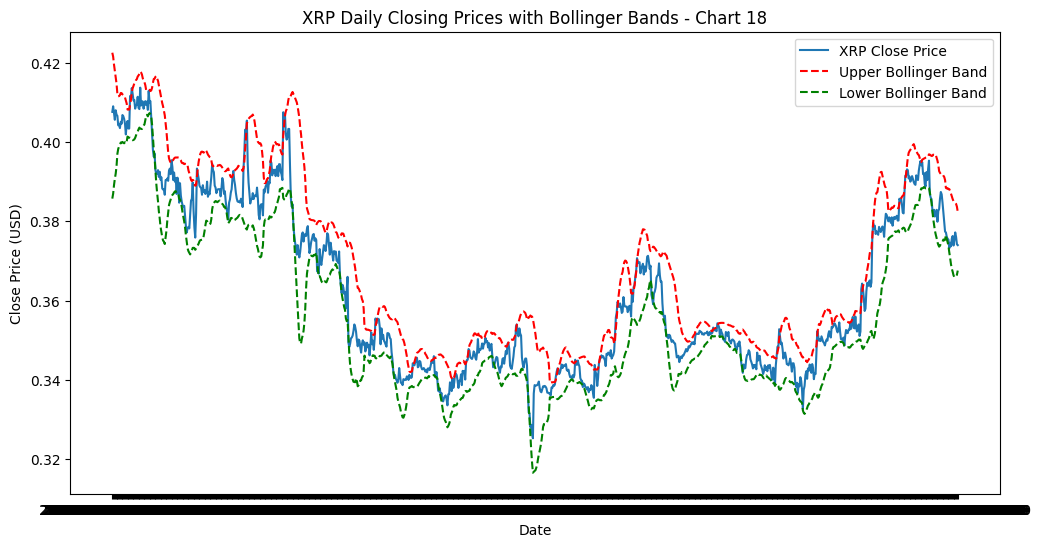

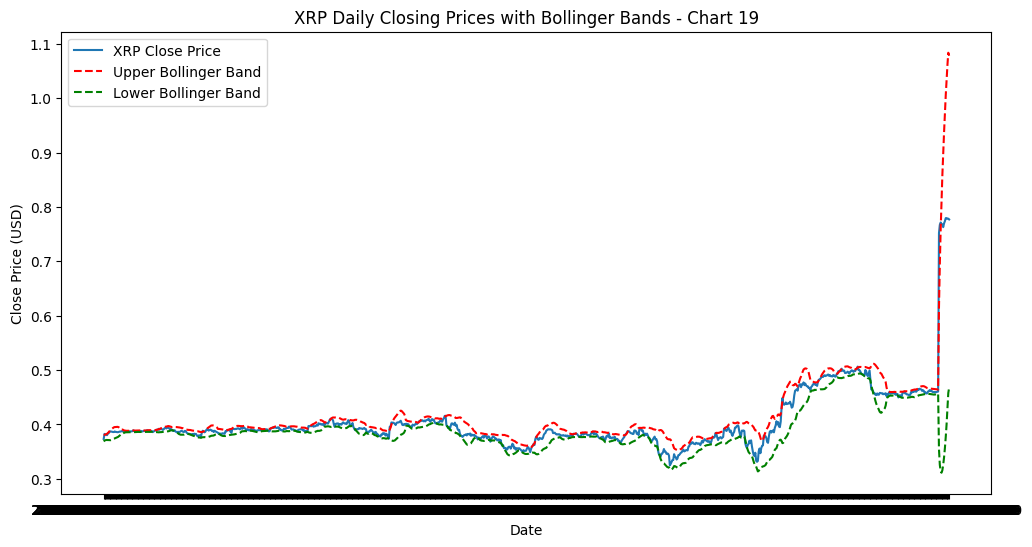

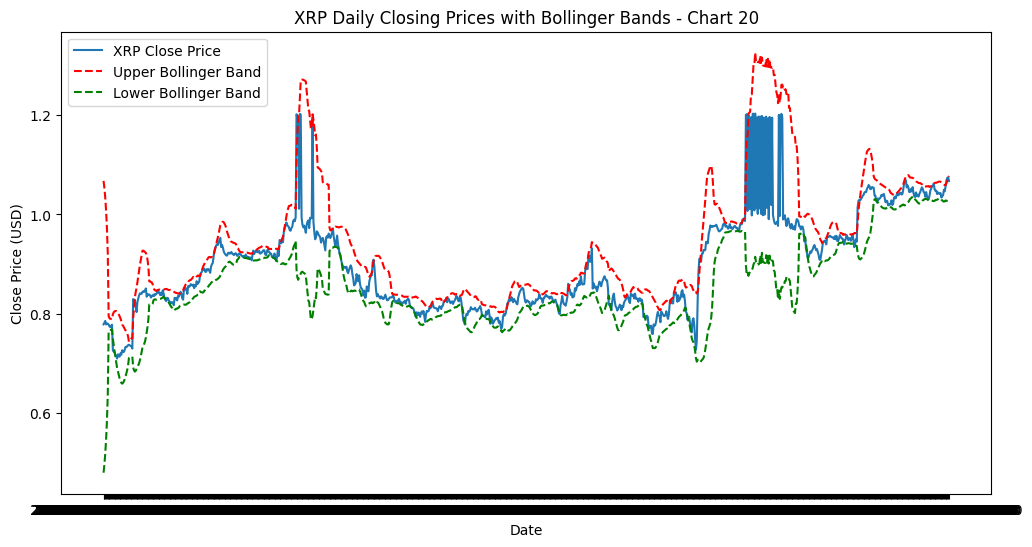

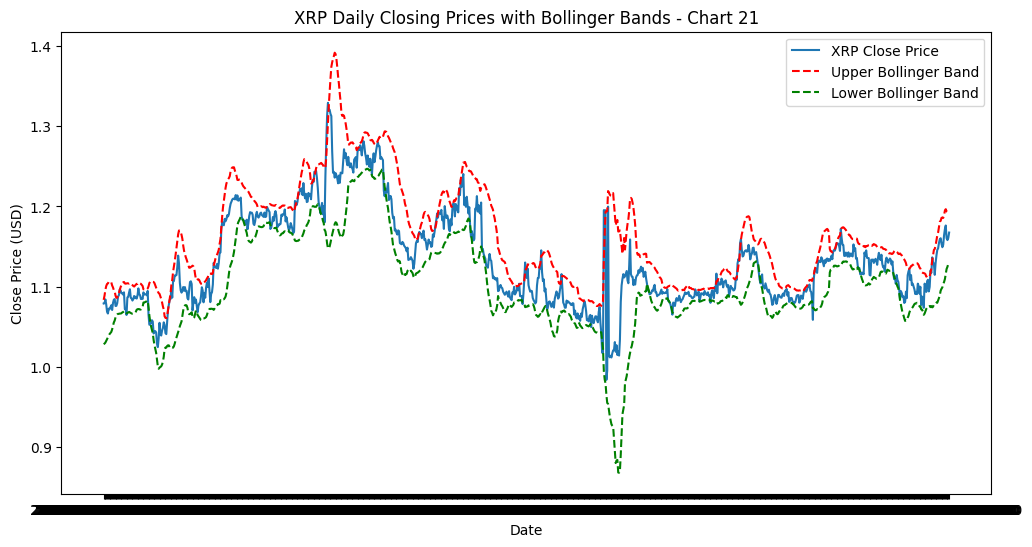

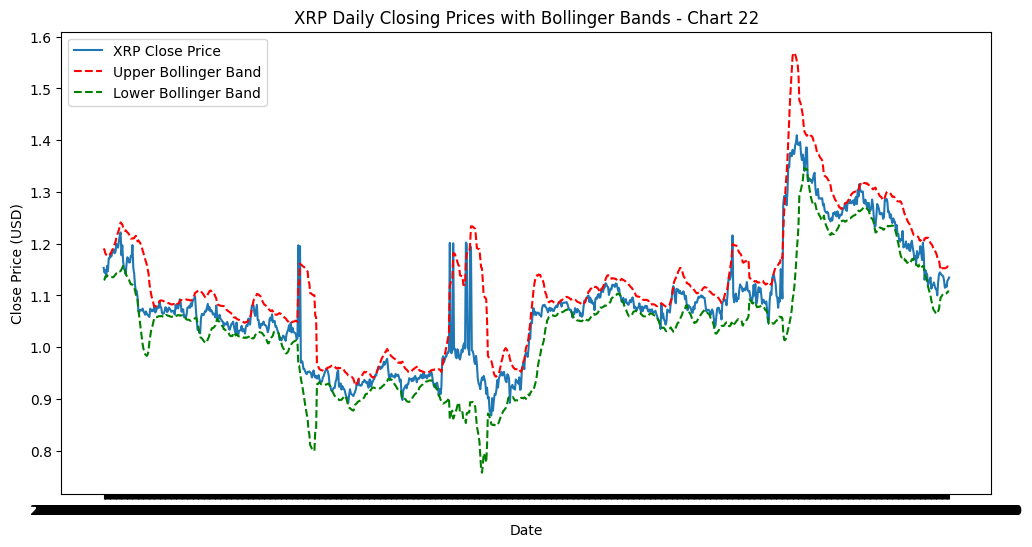

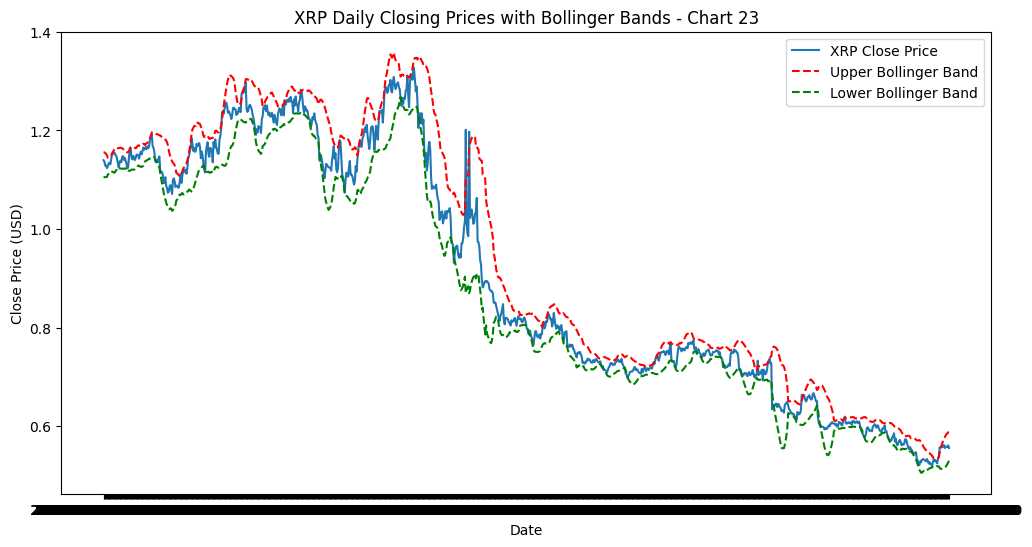

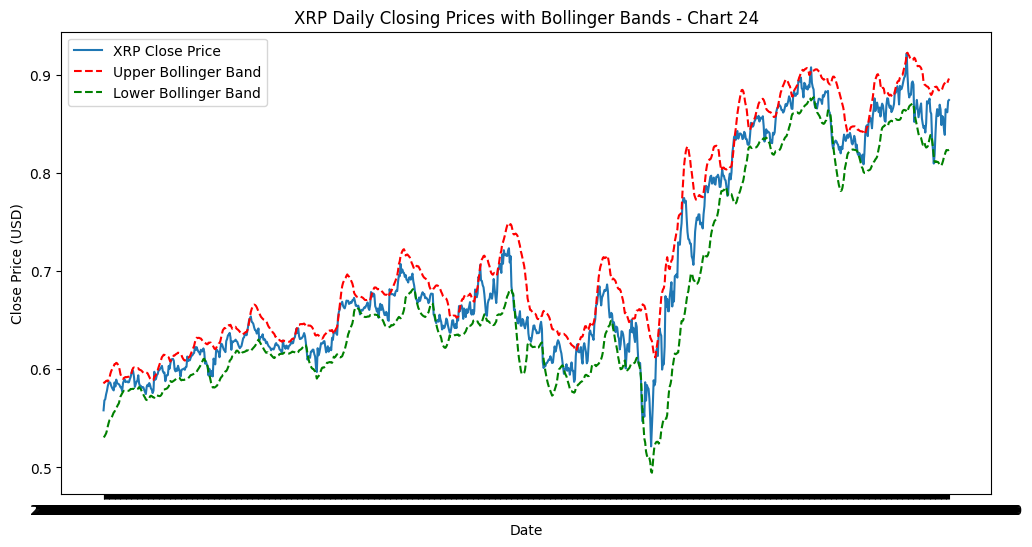

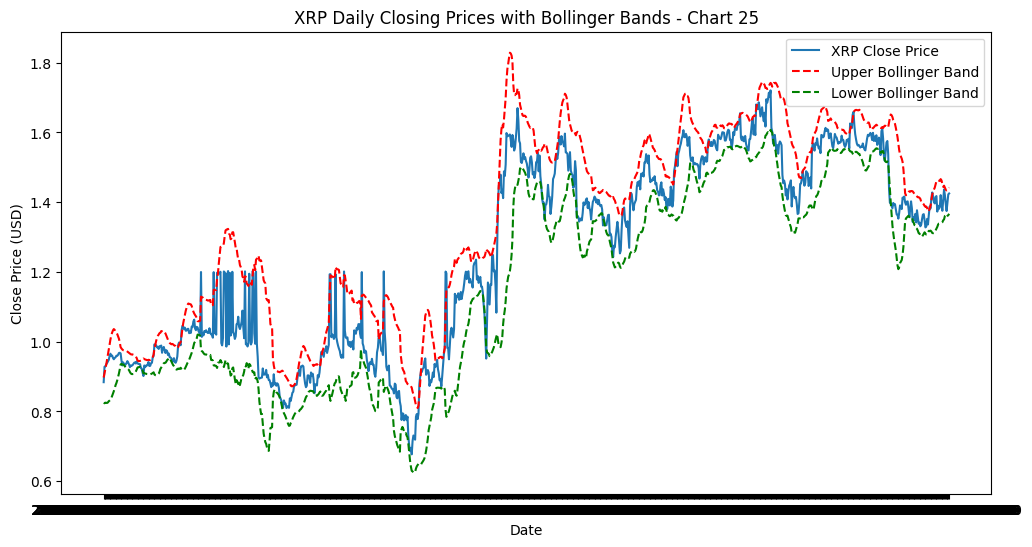

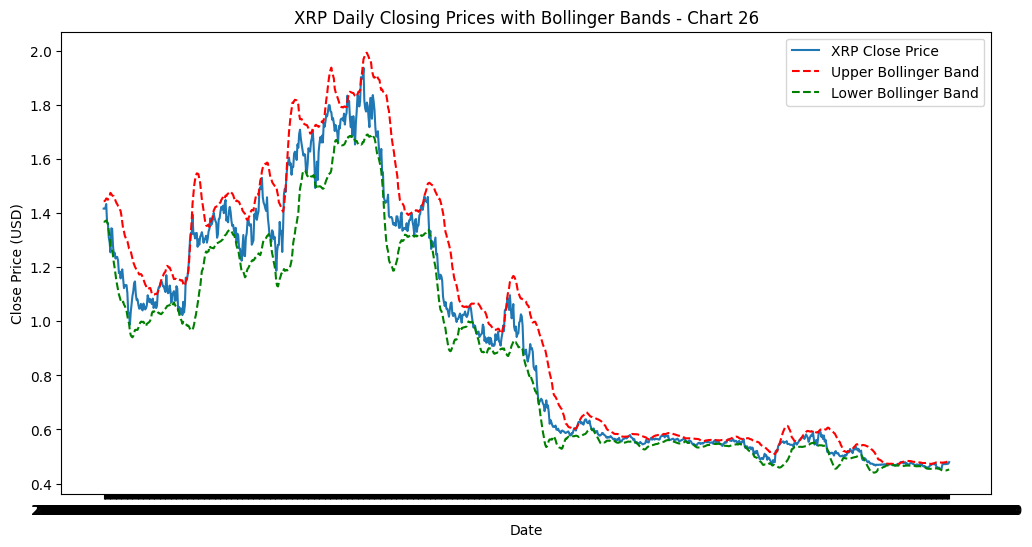

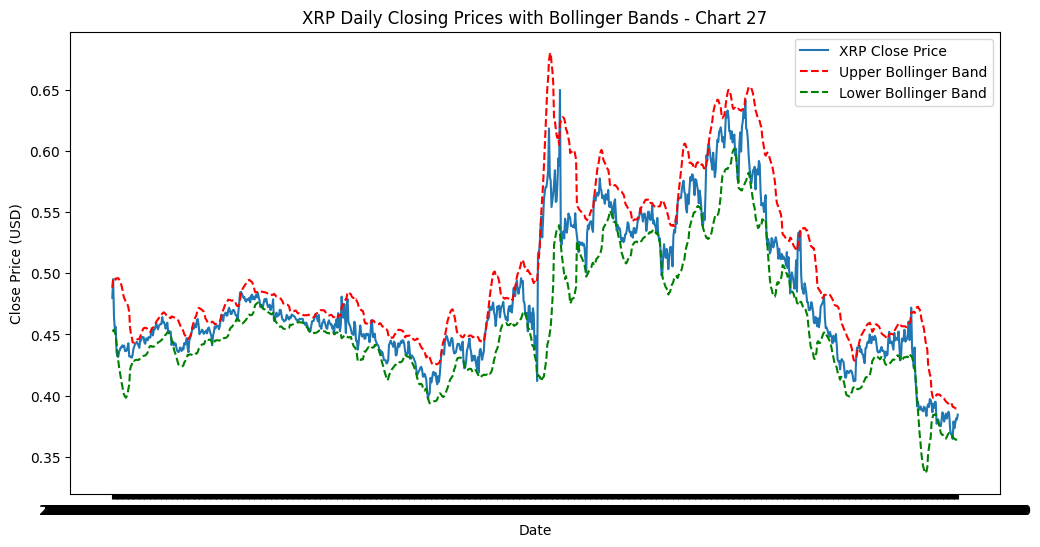

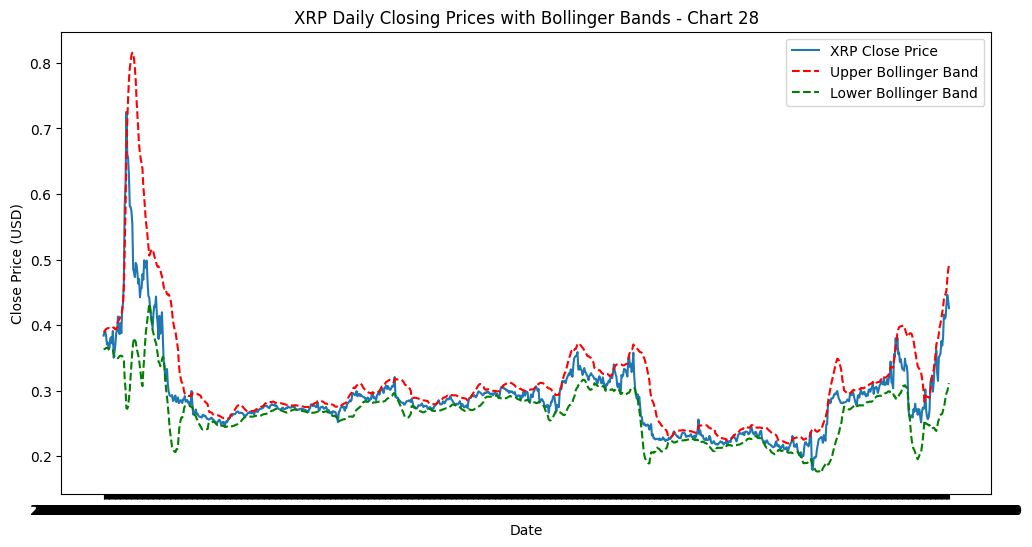

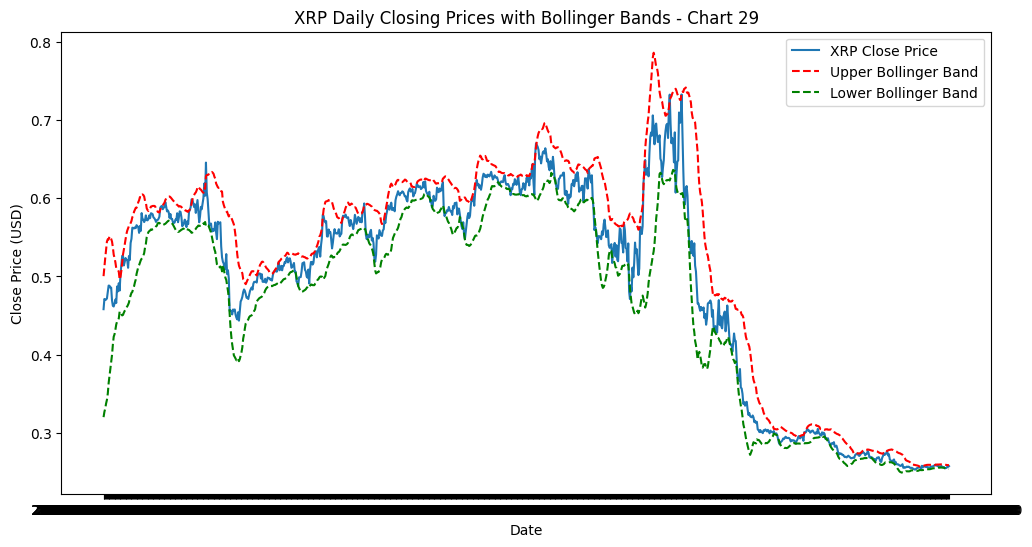

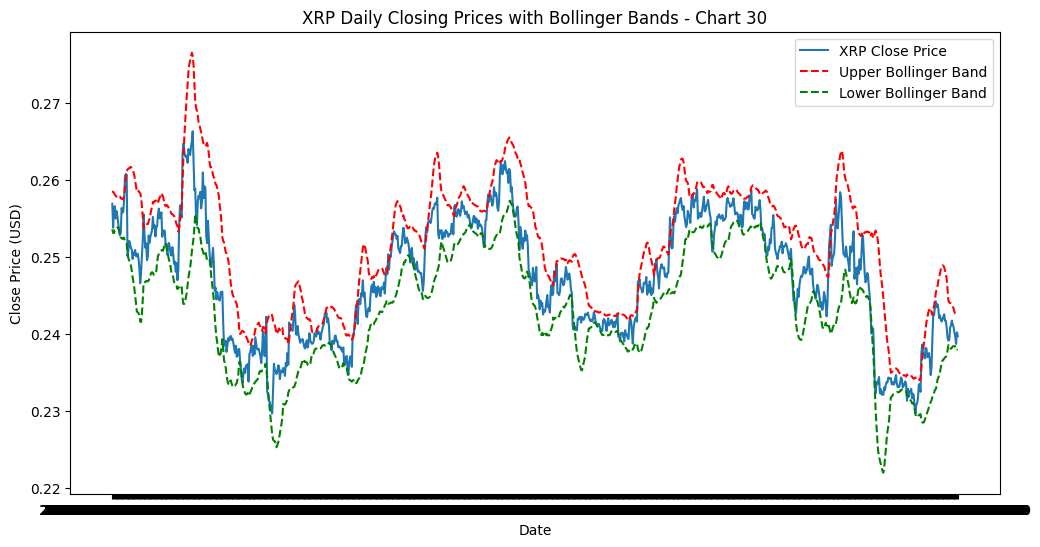

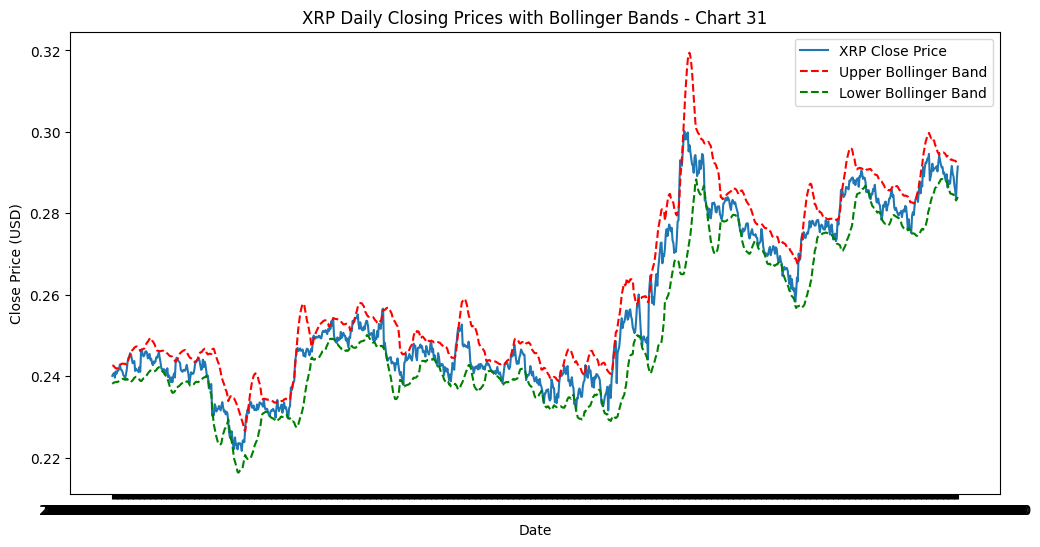

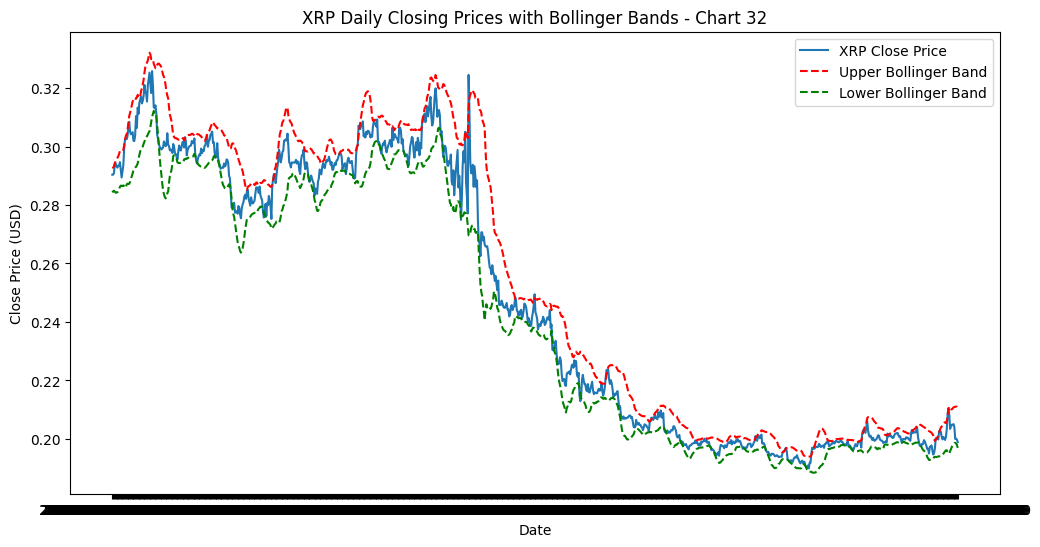

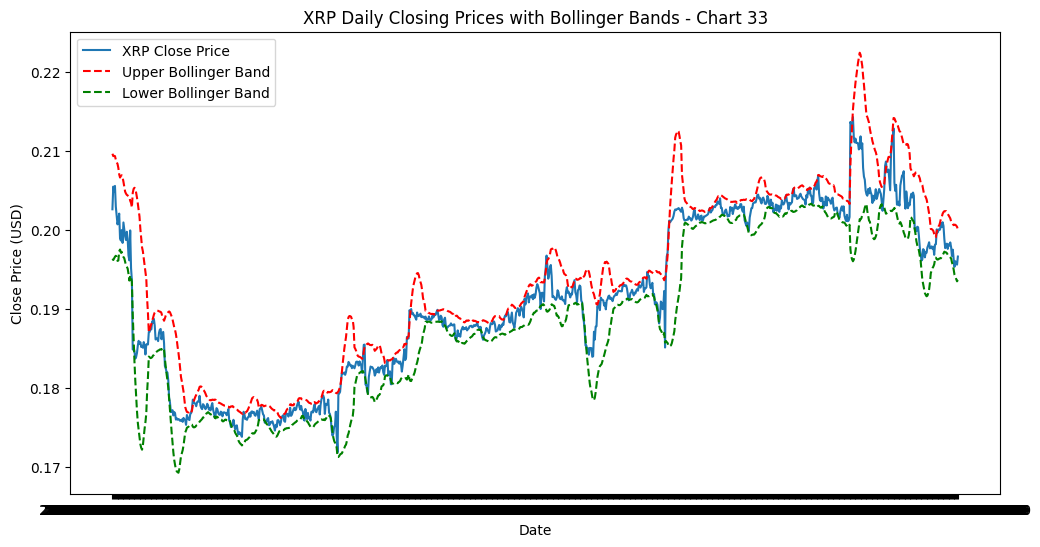

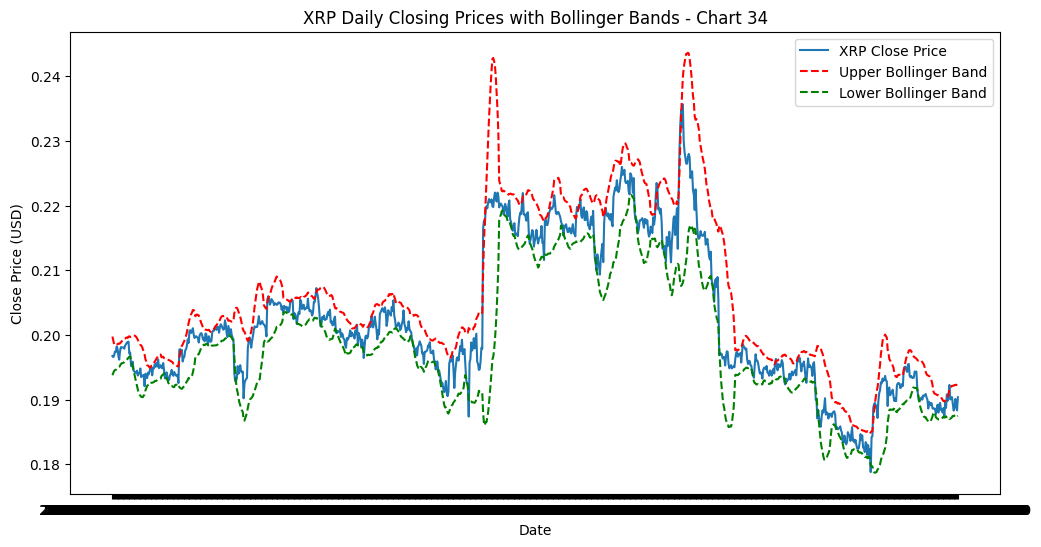

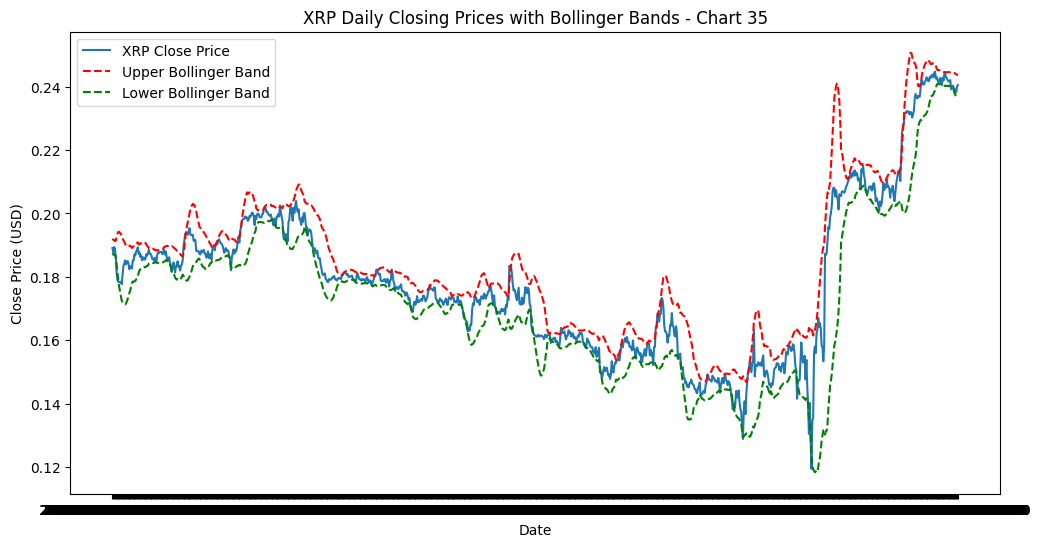

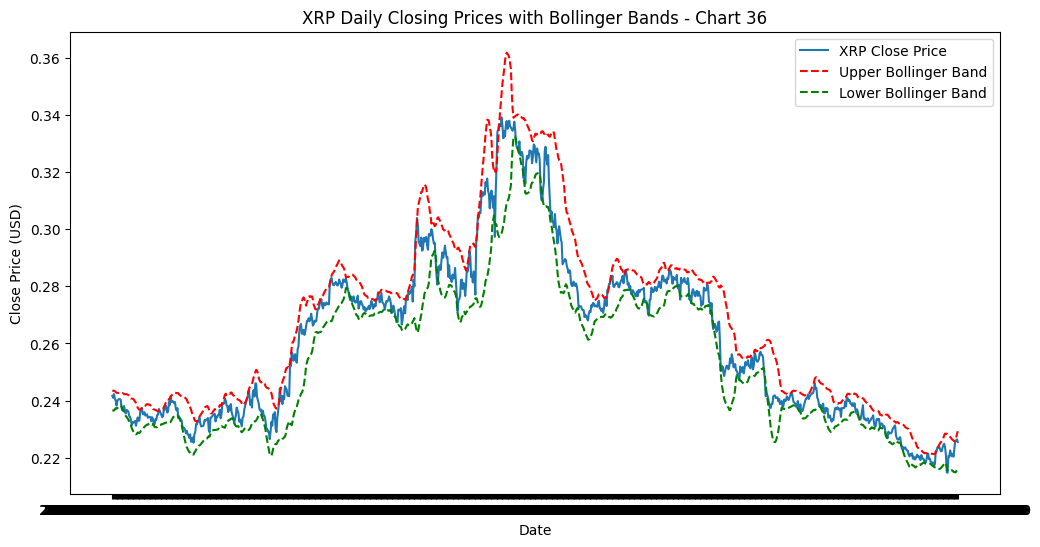

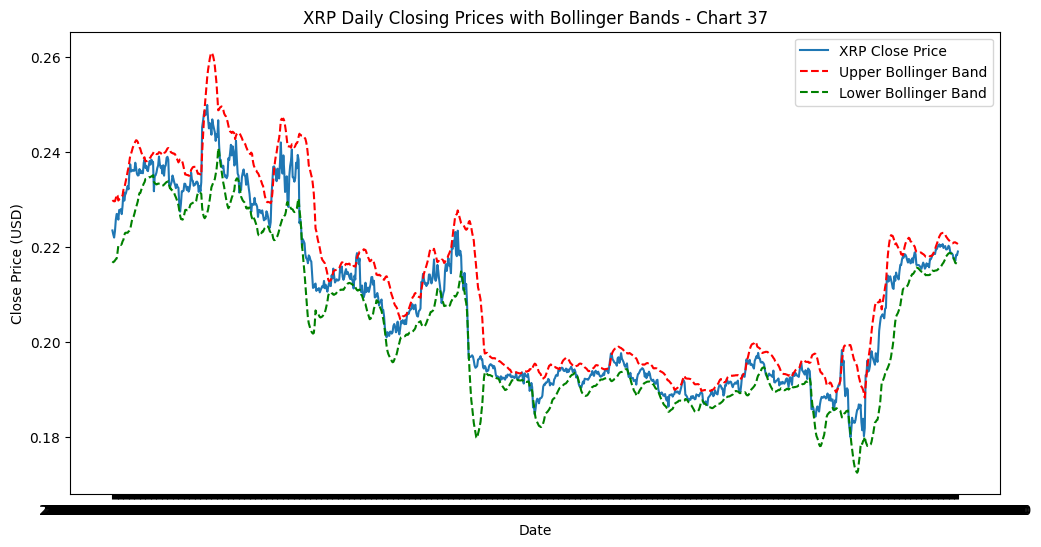

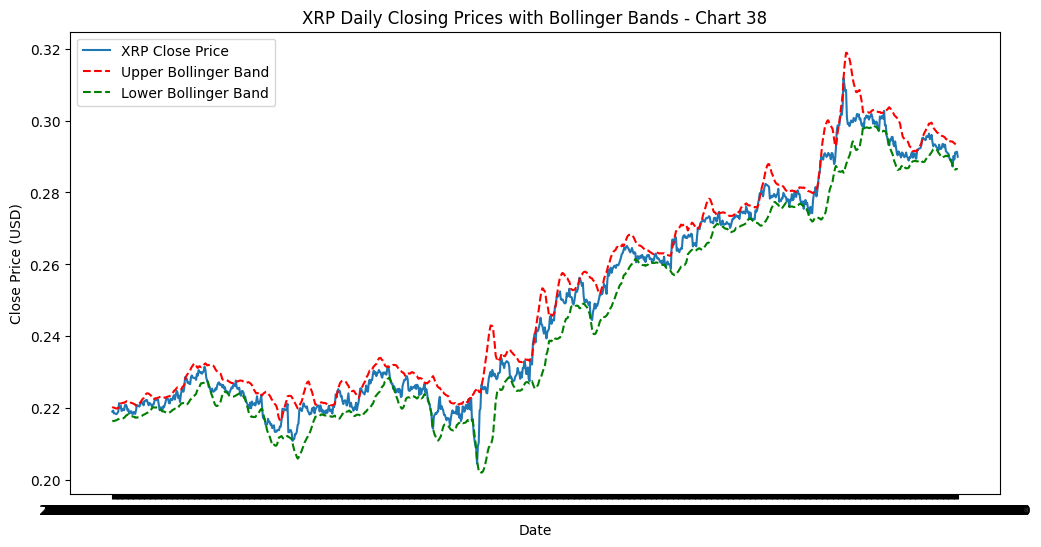

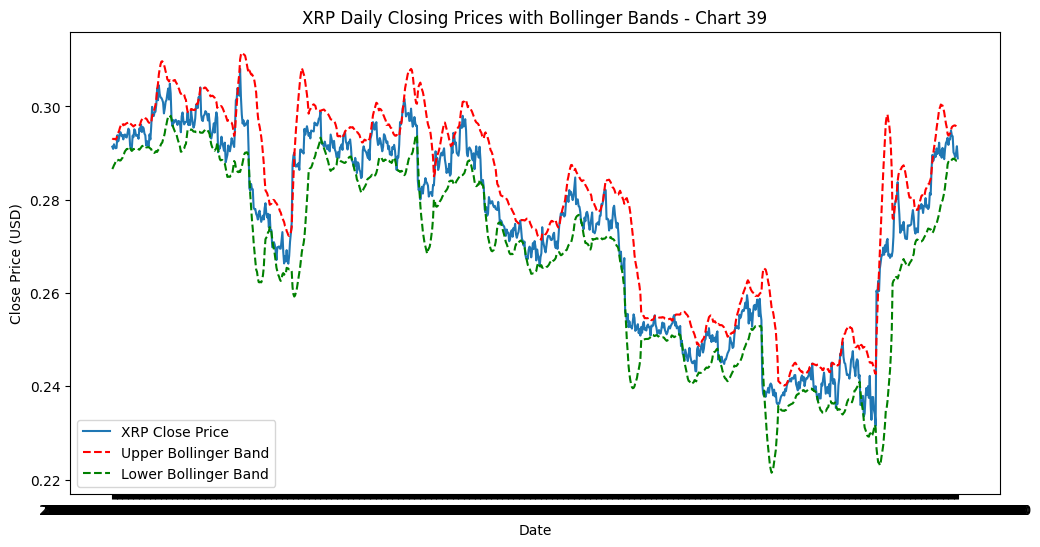

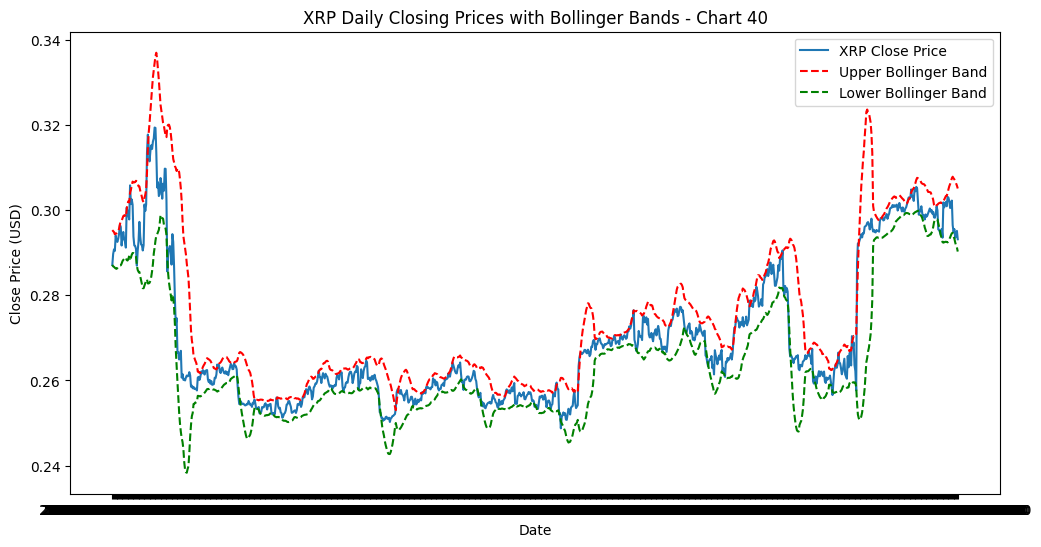

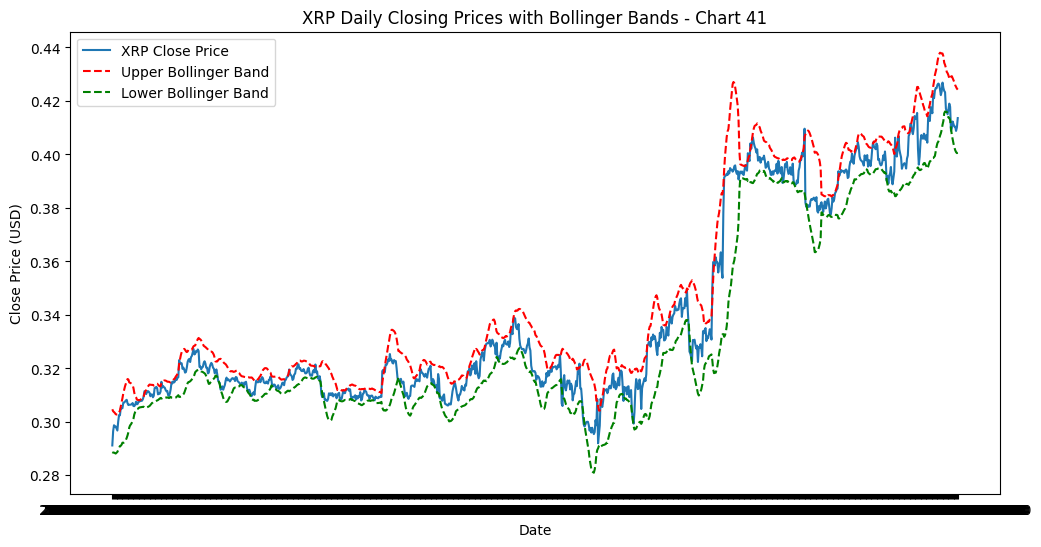

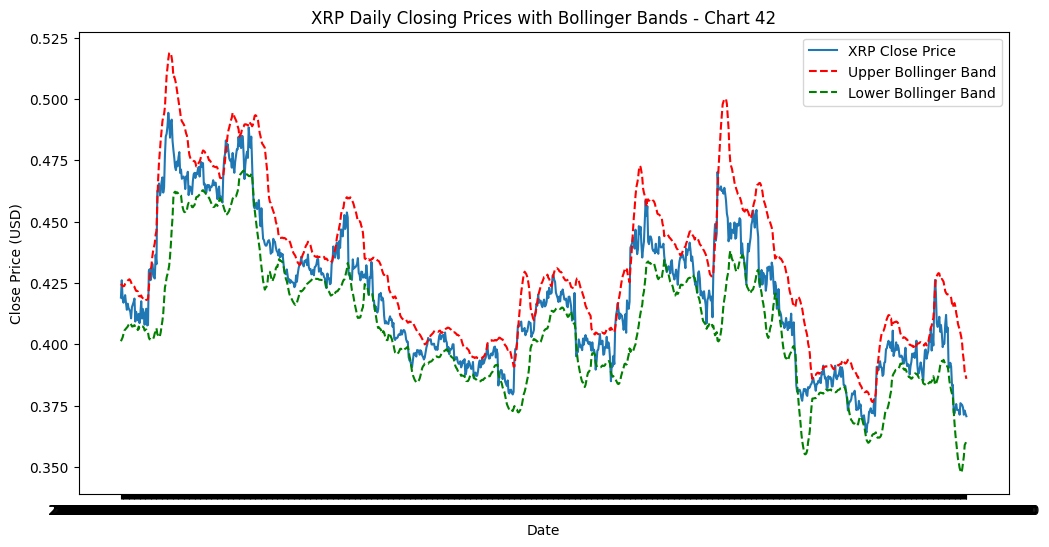

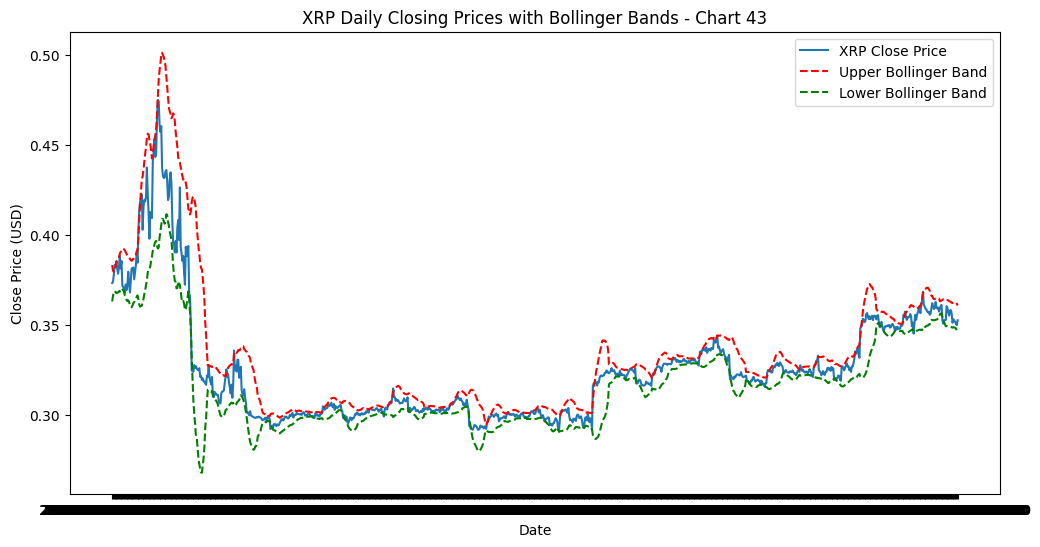

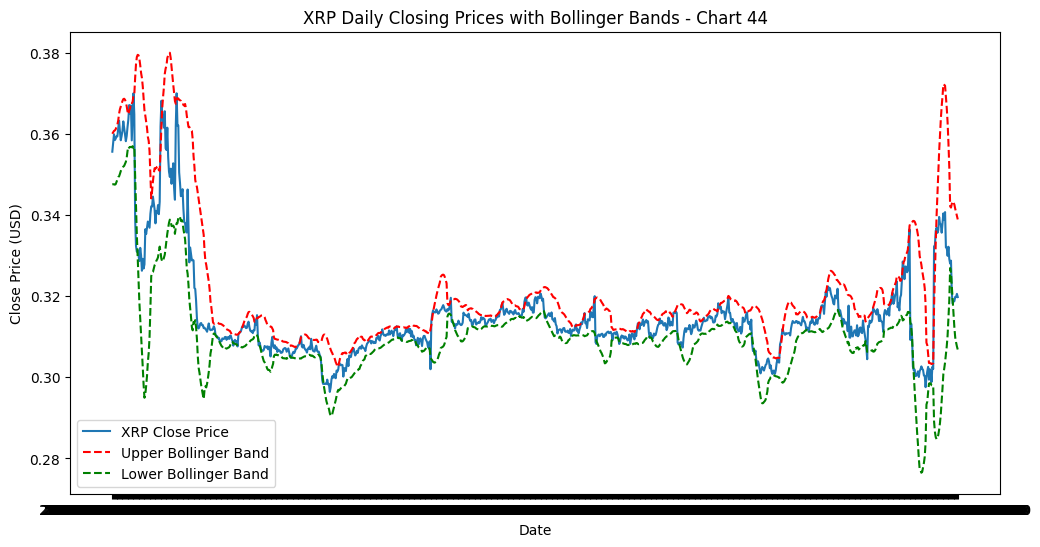

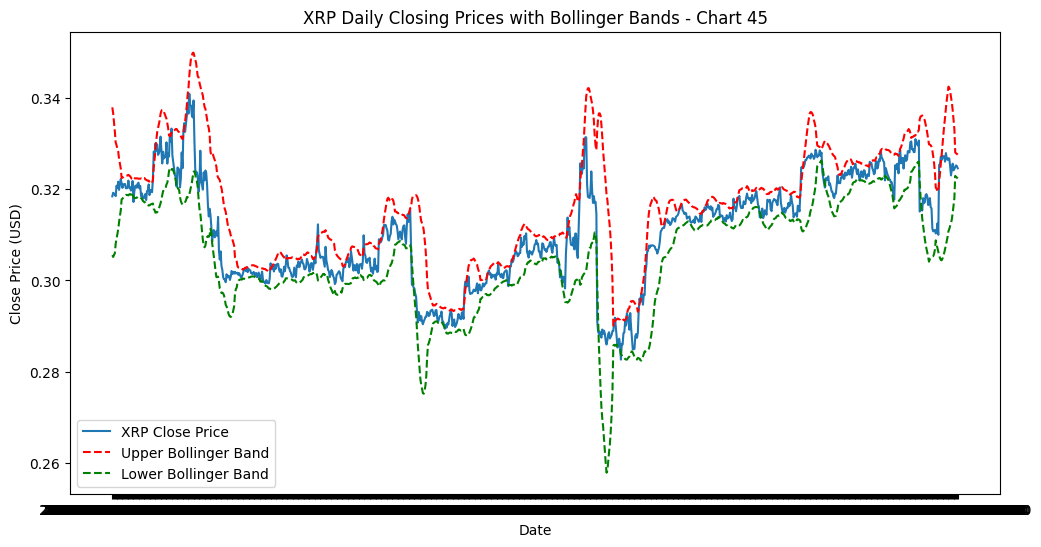

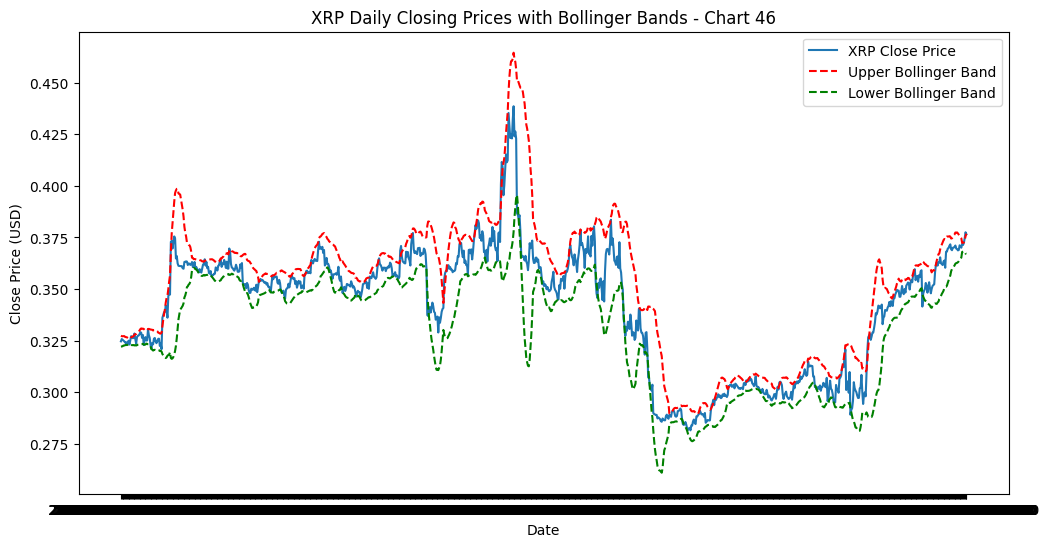

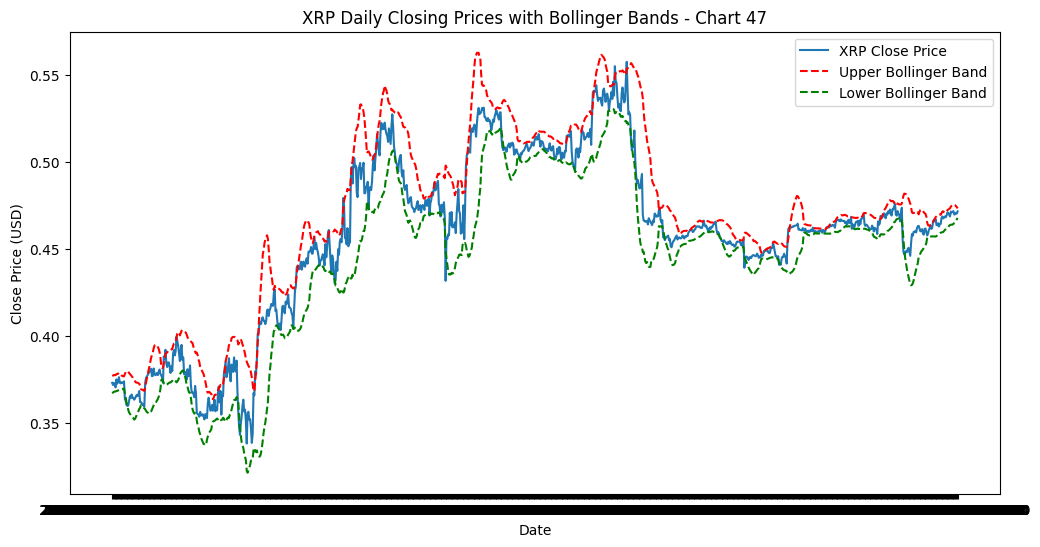

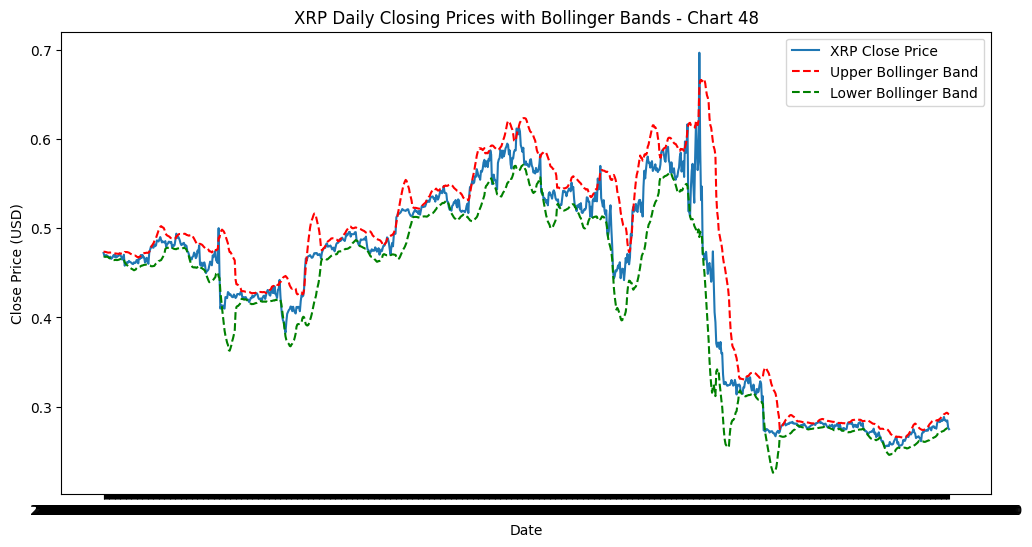

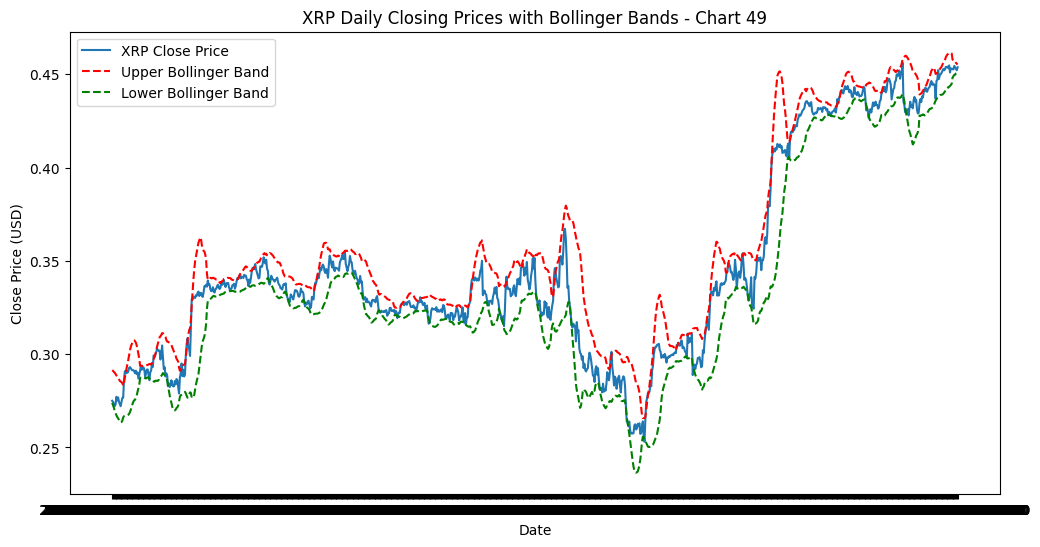

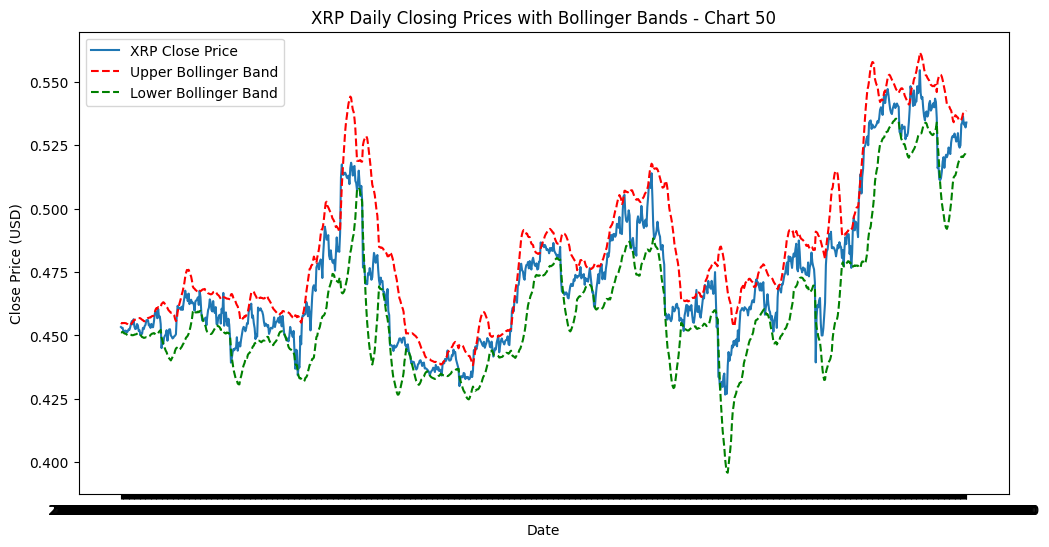

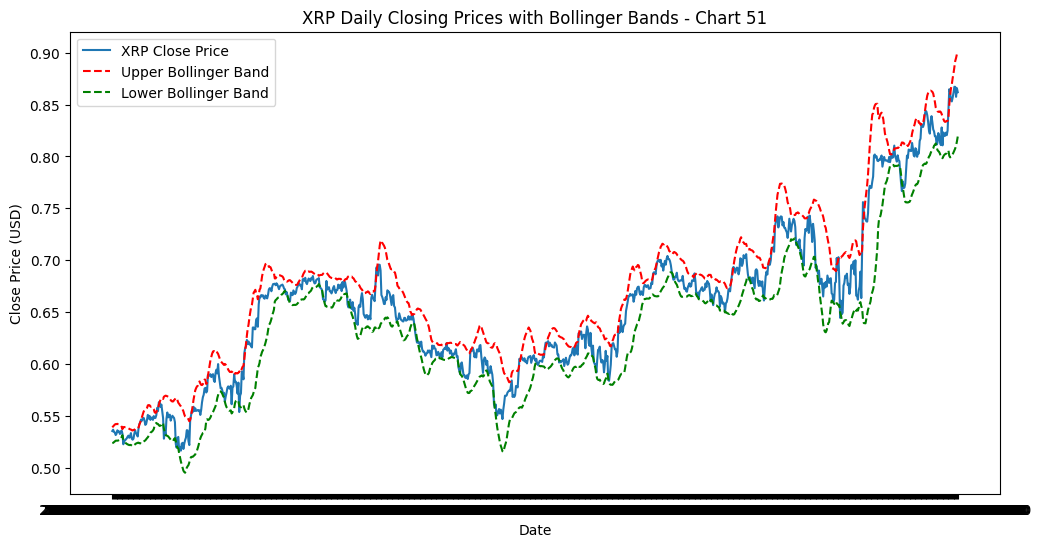

In [7]:
# Generate and display 39 charts showing XRP closing prices with Bollinger Bands (Upper and Lower Bands)
import matplotlib.pyplot as plt  

df['12_MA'] = df['Close'].rolling(window=12).mean()
df['Upper_Band'] = df['12_MA'] + 2 * df['Close'].rolling(window=20).std()
df['Lower_Band'] = df['12_MA'] - 2 * df['Close'].rolling(window=20).std()

rows_per_chart = 1000
num_charts = 51
total_rows = len(df)

for i in range(num_charts):
    start_idx = i * rows_per_chart
    end_idx = (i + 1) * rows_per_chart if (i + 1) * rows_per_chart < total_rows else total_rows

    df_subset = df.iloc[start_idx:end_idx]

    plt.figure(figsize=(12, 6))
    plt.plot(df_subset['Date'], df_subset['Close'], label='XRP Close Price')
    plt.plot(df_subset['Date'], df_subset['Upper_Band'], label='Upper Bollinger Band', linestyle='--', color='red')
    plt.plot(df_subset['Date'], df_subset['Lower_Band'], label='Lower Bollinger Band', linestyle='--', color='green')
    plt.title(f'XRP Daily Closing Prices with Bollinger Bands - Chart {i+1}')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.show()

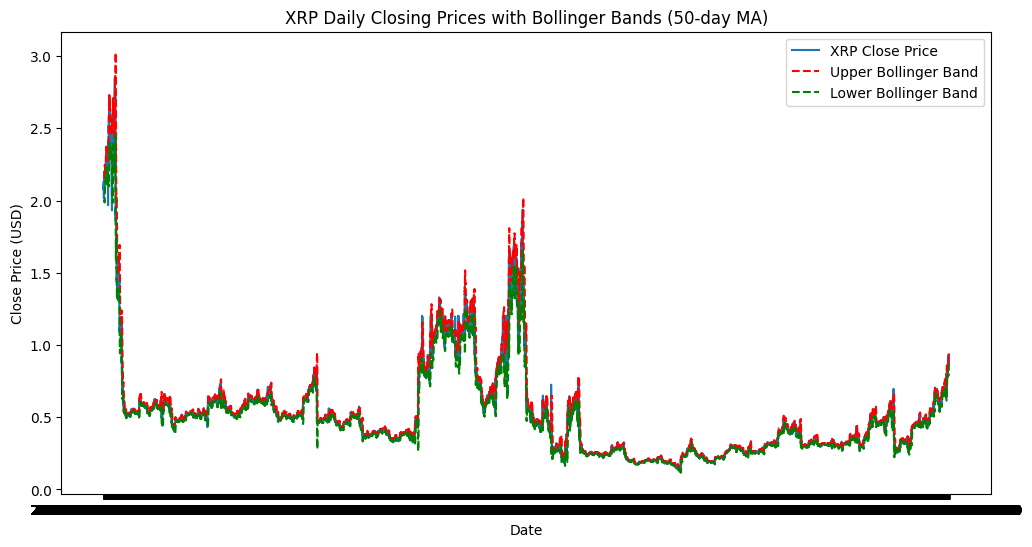

In [8]:
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['Upper_Band'] = df['50_MA'] + 2 * df['Close'].rolling(window=50).std()
df['Lower_Band'] = df['50_MA'] - 2 * df['Close'].rolling(window=50).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='XRP Close Price')
plt.plot(df['Date'], df['Upper_Band'], label='Upper Bollinger Band', linestyle='--', color='red')
plt.plot(df['Date'], df['Lower_Band'], label='Lower Bollinger Band', linestyle='--', color='green')
plt.title('XRP Daily Closing Prices with Bollinger Bands (50-day MA)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [9]:
import pandas as pd

df_heikin_ashi = df.copy()

df_heikin_ashi['HA_Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
df_heikin_ashi['HA_Open'] = (df_heikin_ashi['Open'].shift(1) + df_heikin_ashi['Close'].shift(1)) / 2
df_heikin_ashi['HA_High'] = df_heikin_ashi[['High', 'HA_Open', 'HA_Close']].max(axis=1)
df_heikin_ashi['HA_Low'] = df_heikin_ashi[['Low', 'HA_Open', 'HA_Close']].min(axis=1)

dfh = df_heikin_ashi[['HA_Open', 'HA_Close', 'HA_Low', 'HA_High']]

print(dfh)

        HA_Open  HA_Close    HA_Low  HA_High
0           NaN  2.081150  2.073700  2.08840
1      2.081250  2.088400  2.073600  2.10300
2      2.088500  2.098000  2.088500  2.10500
3      2.099200  2.097000  2.090700  2.10520
4      2.096050  2.088700  2.079600  2.09605
...         ...       ...       ...      ...
51048  0.899115  0.910360  0.899115  0.92450
51049  0.908470  0.904635  0.880000  0.92130
51050  0.908620  0.902160  0.895100  0.91027
51051  0.901635  0.913623  0.901000  0.92850
51052  0.912495  0.855750  0.500000  1.50000

[51053 rows x 4 columns]


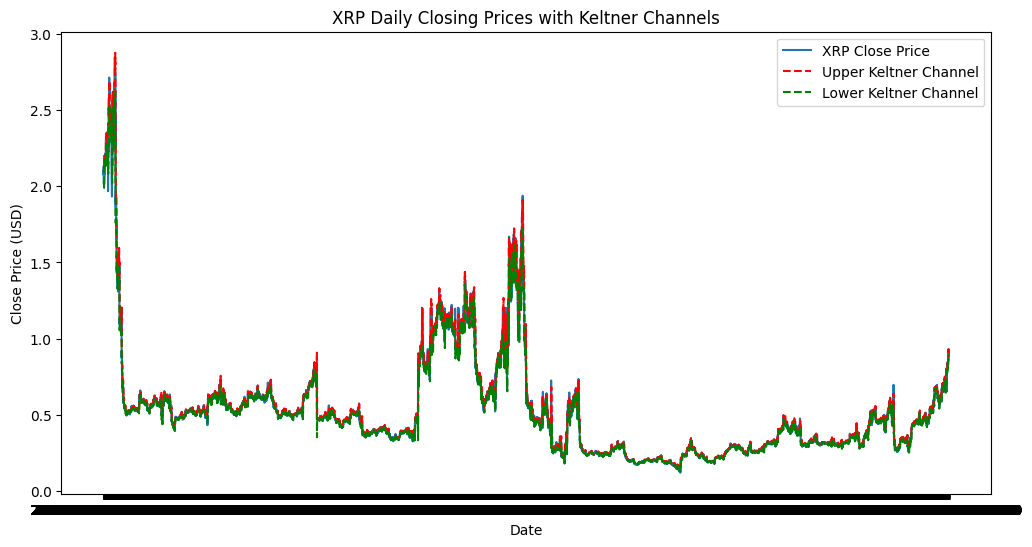

In [10]:
df['MA'] = df['Close'].rolling(window=20).mean()
df['Upper_Channel'] = df['MA'] + 1.5 * df['Close'].rolling(window=20).std()
df['Lower_Channel'] = df['MA'] - 1.5 * df['Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='XRP Close Price')
plt.plot(df['Date'], df['Upper_Channel'], label='Upper Keltner Channel', linestyle='--', color='red')
plt.plot(df['Date'], df['Lower_Channel'], label='Lower Keltner Channel', linestyle='--', color='green')
plt.title('XRP Daily Closing Prices with Keltner Channels')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

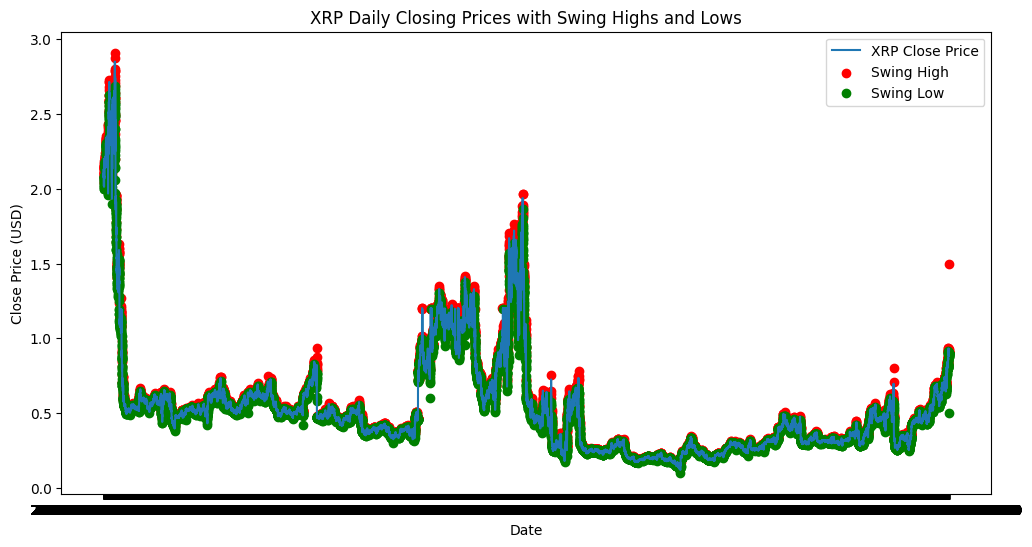

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='XRP Close Price')
plt.scatter(df['Date'][df['High'].rolling(window=3).max() == df['High']], df['High'][df['High'].rolling(window=3).max() == df['High']], color='red', label='Swing High')
plt.scatter(df['Date'][df['Low'].rolling(window=3).min() == df['Low']], df['Low'][df['Low'].rolling(window=3).min() == df['Low']], color='green', label='Swing Low')
plt.title('XRP Daily Closing Prices with Swing Highs and Lows')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

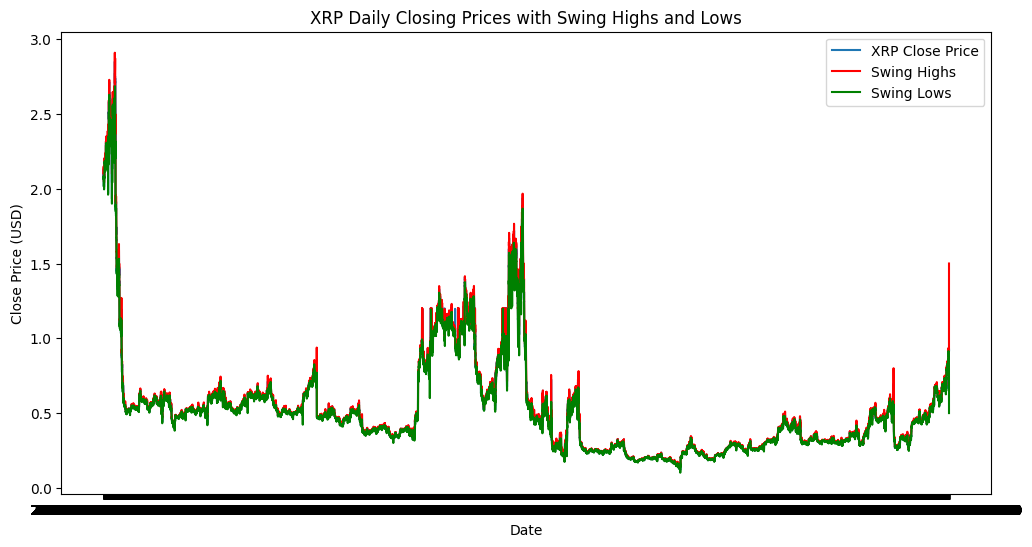

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='XRP Close Price')
plt.plot(df['Date'][df['High'].rolling(window=3).max() == df['High']], df['High'][df['High'].rolling(window=3).max() == df['High']], color='red', linestyle='-', label='Swing Highs')
plt.plot(df['Date'][df['Low'].rolling(window=3).min() == df['Low']], df['Low'][df['Low'].rolling(window=3).min() == df['Low']], color='green', linestyle='-', label='Swing Lows')
plt.title('XRP Daily Closing Prices with Swing Highs and Lows')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

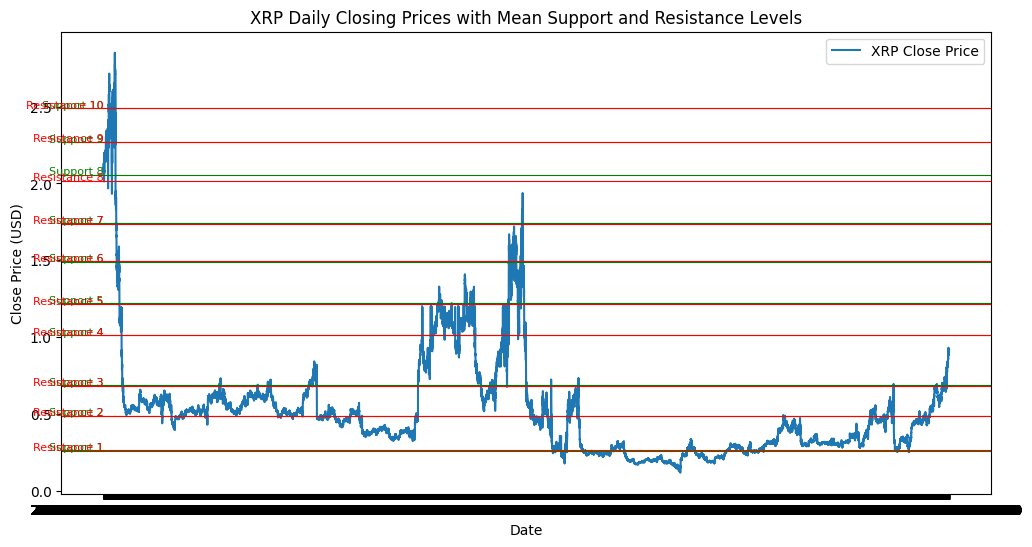

In [13]:
import numpy as np
highest_resistance = df['High'].max()
lowest_support = df['Low'].min()

price_range = np.linspace(lowest_support, highest_resistance, 12)  # 12 points to get 11 segments
price_range_midpoints = (price_range[1:] + price_range[:-1]) / 2

mean_support_resistance = []
for i in range(len(price_range_midpoints) - 1):
    support_area = df[(df['Low'] >= price_range[i]) & (df['Low'] < price_range[i + 1])]['Low'].mean()
    resistance_area = df[(df['High'] >= price_range[i]) & (df['High'] < price_range[i + 1])]['High'].mean()
    mean_support_resistance.append((support_area, resistance_area))

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='XRP Close Price')

for support, resistance in mean_support_resistance:
    plt.axhline(y=support, color='green', linestyle='-', linewidth=0.8)
    plt.axhline(y=resistance, color='red', linestyle='-', linewidth=0.8)


for i, (support, resistance) in enumerate(mean_support_resistance):
    plt.text(df['Date'].iloc[0], support, f'Support {i+1}', color='green', fontsize=8, ha='right')
    plt.text(df['Date'].iloc[0], resistance, f'Resistance {i+1}', color='red', fontsize=8, ha='right')

plt.title('XRP Daily Closing Prices with Mean Support and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [14]:
df["12_MA"].describe()

count    51042.000000
mean         0.523022
std          0.348387
min          0.138679
25%          0.301289
50%          0.464986
75%          0.591606
max          2.723333
Name: 12_MA, dtype: float64

In [15]:
percentage_threshold = 10
df['ema_pct_change'] = df['12_MA'].pct_change() * 100

no_change_periods = df[abs(df['ema_pct_change']) <= percentage_threshold]

print(no_change_periods.count())

Unix              51041
Date              51041
Symbol            51041
Open              51041
High              51041
Low               51041
Close             51041
Volume XRP        51041
Volume USDT       51041
tradecount        51041
12_MA             51041
Upper_Band        51004
Lower_Band        51004
50_MA             51004
MA                51034
Upper_Channel     51034
Lower_Channel     51034
ema_pct_change    51041
dtype: int64


In [19]:
# Bad solution O(n²) Total iterations ≈ n + (n-1) + (n-2) + ... + 1 = n(n+1)/2
# For n = 50,000, that's approximately 1.25 billion iterations
# Expected execution time: ~8-12 hours on a standard modern computer
percentage_threshold = 10
df['consecutive_rows'] = 0

for i in range(len(df)):
    s = 0
    for j in range(i + 1, len(df)):
        percent_change = ((df.iloc[j]['12_MA'] - df.iloc[i]['12_MA']) / abs(df.iloc[i]['12_MA'])) * 100
        if abs(percent_change) <= percentage_threshold:
            s += 1
        else:
            break
    df.at[i, 'consecutive_rows'] = s

print(df)

KeyboardInterrupt: 

In [18]:
import numpy as np

def calculate_consecutive_rows(df, percentage_threshold):
    ma_values = df['12_MA'].values
    n = len(df)
    consecutive_rows = np.zeros(n)
    
    for i in range(n):
        base_value = ma_values[i]
        future_values = ma_values[i+1:]
        percent_changes = ((future_values - base_value) / abs(base_value)) * 100
        mask = np.abs(percent_changes) <= percentage_threshold
        consecutive_rows[i] = np.argmin(mask) if not all(mask) else len(mask)
    
    return consecutive_rows

df['consecutive_rows'] = calculate_consecutive_rows(df, percentage_threshold)
print(df)

                Unix                 Date   Symbol     Open     High     Low  \
0      1735686000000  2024-12-31 23:00:00  XRPUSDT  2.07890  2.08840  2.0737   
1      1735682400000  2024-12-31 22:00:00  XRPUSDT  2.09820  2.10300  2.0736   
2      1735678800000  2024-12-31 21:00:00  XRPUSDT  2.10020  2.10500  2.0886   
3      1735675200000  2024-12-31 20:00:00  XRPUSDT  2.09180  2.10520  2.0907   
4      1735671600000  2024-12-31 19:00:00  XRPUSDT  2.08770  2.09570  2.0796   
...              ...                  ...      ...      ...      ...     ...   
51048  1525435200000  2018-05-04 12:00:00  XRPUSDT  0.91596  0.92450  0.9000   
51049  1525431600000  2018-05-04 11:00:00  XRPUSDT  0.90128  0.92130  0.8800   
51050  1525428000000  2018-05-04 10:00:00  XRPUSDT  0.90199  0.91027  0.8951   
51051  1525424400000  2018-05-04 09:00:00  XRPUSDT  0.92300  0.92850  0.9010   
51052  1525420800000  2018-05-04 08:00:00  XRPUSDT  0.50000  1.50000  0.5000   

         Close  Volume XRP   Volume USD